#EDA - 1#

**Bike Details Dataset**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('BIKE DETAILS.csv')

In [4]:
# Q-1 What is the range of selling prices in the dataset?

min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price

print(f"Minimum Selling Price: ₹{min_price}")
print(f"Maximum Selling Price: ₹{max_price}")
print(f"Range of Selling Prices: ₹{price_range}")


Minimum Selling Price: ₹5000
Maximum Selling Price: ₹760000
Range of Selling Prices: ₹755000


In [5]:
#Q-2 What is the median selling price for bikes in the dataset?

median_price = df['selling_price'].median()
print(f"Median Selling Price: ₹{median_price}")


Median Selling Price: ₹45000.0


In [6]:
#Q-3 What is the most common seller type?

# Count frequency of each seller type
seller_counts = df['seller_type'].value_counts()

# Display the most common seller type
most_common_seller = seller_counts.idxmax()
most_common_count = seller_counts.max()

print("Seller Type Counts:")
print(seller_counts)
print(f"\nMost Common Seller Type: {most_common_seller} ({most_common_count} listings)")


Seller Type Counts:
seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

Most Common Seller Type: Individual (1055 listings)


In [10]:
# Q-4 How many bikes have driven more than 50,000 kilometers?

# Clean and convert 'km_driven' to numeric
df['km_driven_cleaned'] = df['km_driven'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

# Filter bikes driven more than 50,000 km
bikes_over_50k = df[df['km_driven_cleaned'] > 50000]

# Result
print(f"Number of bikes driven more than 50,000 km: {len(bikes_over_50k)}")




Number of bikes driven more than 50,000 km: 170


In [11]:
#Q-5 What is the average km_driven value for each ownership type?

# Ensure 'km_driven_cleaned' exists (run if not done already)
df['km_driven_cleaned'] = df['km_driven'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

# Group by ownership type and calculate average km driven
avg_km_by_owner = df.groupby('owner')['km_driven_cleaned'].mean().sort_values(ascending=False)

# Display result
print("Average km driven for each ownership type:")
print(avg_km_by_owner)


Average km driven for each ownership type:
owner
4th owner    311500.000000
2nd owner     39288.991870
3rd owner     33292.181818
1st owner     32816.583333
Name: km_driven_cleaned, dtype: float64


In [12]:
# Q-6 What proportion of bikes are from the year 2015 or older?

# Filter bikes from 2015 or earlier
bikes_2015_or_older = df[df['year'] <= 2015]

# Calculate proportion
proportion = len(bikes_2015_or_older) / len(df)

# Display result as percentage
print(f"Proportion of bikes from 2015 or older: {proportion:.2%}")


Proportion of bikes from 2015 or older: 56.64%


In [15]:
# Q-7 What is the trend of missing values across the dataset?

missing_values = df.isnull().sum()

# Filter to show only columns with missing values and sort
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Print the trend of missing values
print("Trend of Missing Values across the dataset:")
print(missing_values)



Trend of Missing Values across the dataset:
ex_showroom_price    435
dtype: int64


In [16]:
# Q-8 What is the highest ex_showroom_price recorded, and for which bike?

# Find the row with the maximum ex_showroom_price
highest_ex_showroom = df.loc[df['ex_showroom_price'].idxmax()]

# Extract the highest price and the corresponding bike name
highest_price = highest_ex_showroom['ex_showroom_price']
bike_name = highest_ex_showroom['name']

print(f"The highest ex_showroom_price recorded is ₹{highest_price} for the bike: {bike_name}")

The highest ex_showroom_price recorded is ₹1278000.0 for the bike: Harley-Davidson Street Bob


In [17]:
# Q-9 What is the total number of bikes listed by each seller type?

seller_type_counts = df['seller_type'].value_counts()

print("Total number of bikes listed by each seller type:")
seller_type_counts

Total number of bikes listed by each seller type:


seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


Correlation between Selling Price and KM Driven for First Owner Bikes: nan

Interpretation:


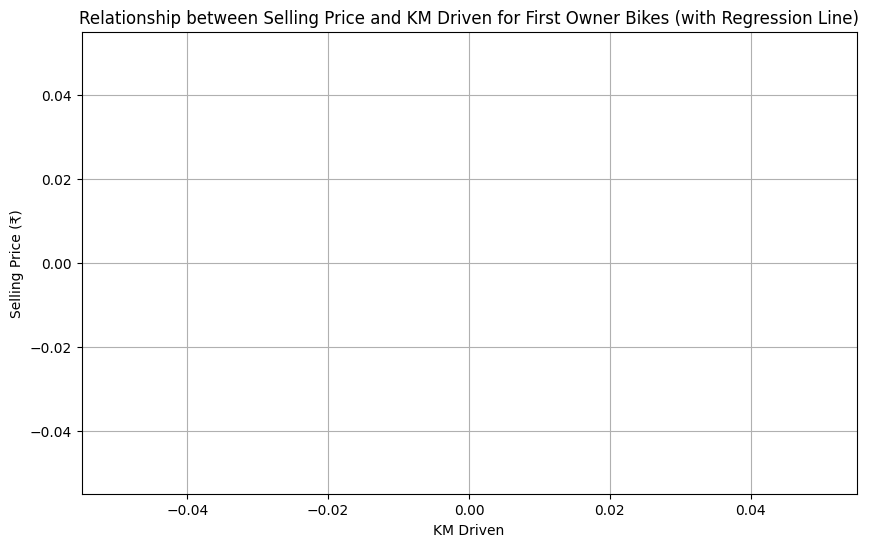

In [20]:
#Q-10 What is the relationship between selling_price and km_driven for first-owner bikes?

import matplotlib.pyplot as plt
# Filter the DataFrame for first-owner bikes
first_owner_df = df[df['owner'] == 'First Owner'].copy()

# Ensure 'km_driven_cleaned' is available and clean it if not already done
if 'km_driven_cleaned' not in first_owner_df.columns:
    first_owner_df['km_driven_cleaned'] = first_owner_df['km_driven'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

# Scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=first_owner_df, x='km_driven_cleaned', y='selling_price', alpha=0.6)
plt.title('Relationship between Selling Price and KM Driven for First Owner Bikes')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price (₹)')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = first_owner_df['km_driven_cleaned'].corr(first_owner_df['selling_price'])

print(f"\nCorrelation between Selling Price and KM Driven for First Owner Bikes: {correlation:.2f}")

# Interpretation:
# A correlation close to -1 indicates a strong negative linear relationship (as KM Driven increases, Selling Price tends to decrease).
# A correlation close to 1 indicates a strong positive linear relationship (as KM Driven increases, Selling Price tends to increase).
# A correlation close to 0 indicates a weak or no linear relationship.

print("\nInterpretation:")
if correlation < -0.5:
    print("There is a strong negative linear relationship.")
elif correlation > 0.5:
    print("There is a strong positive linear relationship.")
elif correlation >= -0.5 and correlation <= 0.5:
    print("There is a weak or no strong linear relationship.")

# You can also look at the trend using a regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=first_owner_df, x='km_driven_cleaned', y='selling_price', scatter_kws={'alpha':0.4})
plt.title('Relationship between Selling Price and KM Driven for First Owner Bikes (with Regression Line)')
plt.xlabel('KM Driven')
plt.ylabel('Selling Price (₹)')
plt.grid(True)
plt.show()

In [21]:
# Q-11 Identify and remove outliers in the km_driven column using the IQR method.

import matplotlib.pyplot as plt


# Ensure 'km_driven_cleaned' is available and clean it if not already done
if 'km_driven_cleaned' not in df.columns:
    df['km_driven_cleaned'] = df['km_driven'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)

# Calculate the IQR for km_driven_cleaned
Q1 = df['km_driven_cleaned'].quantile(0.25)
Q3 = df['km_driven_cleaned'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['km_driven_cleaned'] < lower_bound) | (df['km_driven_cleaned'] > upper_bound)]

print(f"Number of outliers identified in km_driven: {len(outliers)}")
print("Outlier rows (first 5):")
print(outliers.head())

# Remove outliers
df_no_outliers = df[(df['km_driven_cleaned'] >= lower_bound) & (df['km_driven_cleaned'] <= upper_bound)].copy()

print(f"\nShape of original DataFrame: {df.shape}")
print(f"Shape of DataFrame after removing outliers: {df_no_outliers.shape}")

# Optional: Visualize the distribution before and after removing outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['km_driven_cleaned'])
plt.title('KM Driven Distribution (Original)')
plt.xlabel('KM Driven')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_no_outliers['km_driven_cleaned'])
plt.title('KM Driven Distribution (Outliers Removed)')
plt.xlabel('KM Driven')

plt.tight_layout()
plt.show()


Number of outliers identified in km_driven: 39
Outlier rows (first 5):
                         name  selling_price  year seller_type      owner  \
91   Honda Activa [2000-2015]          22989  2012  Individual  1st owner   
93              Suzuki GS150R          30000  2010  Individual  1st owner   
115   Hero Honda Passion Plus           7500  2004  Individual  1st owner   
135    Hero Honda CBZ extreme          20000  2007  Individual  1st owner   
154        Hero Xtreme Sports          22000  2014  Individual  1st owner   

     km_driven  ex_showroom_price  km_driven_cleaned  
91      500000            50267.0           500000.0  
93      130000            70851.0           130000.0  
115     120000                NaN           120000.0  
135      90000                NaN            90000.0  
154      99000            78350.0            99000.0  

Shape of original DataFrame: (1061, 8)
Shape of DataFrame after removing outliers: (1022, 8)


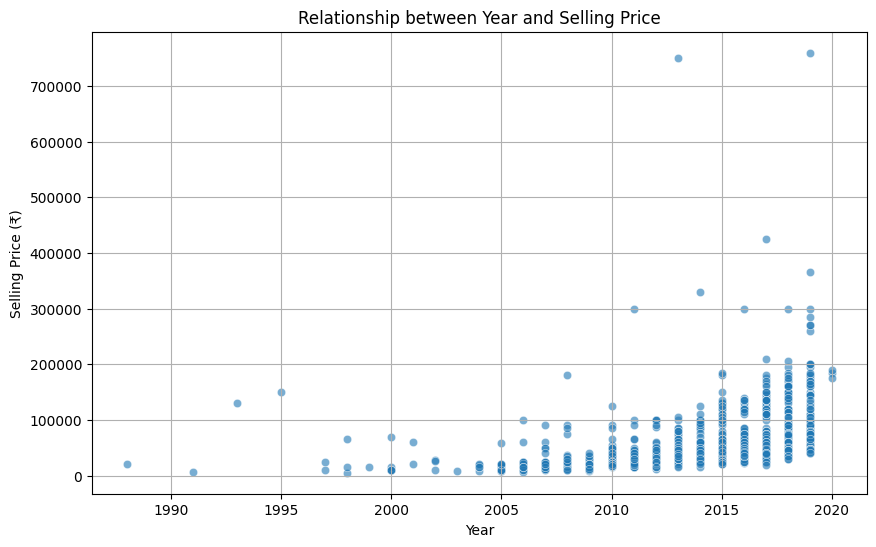

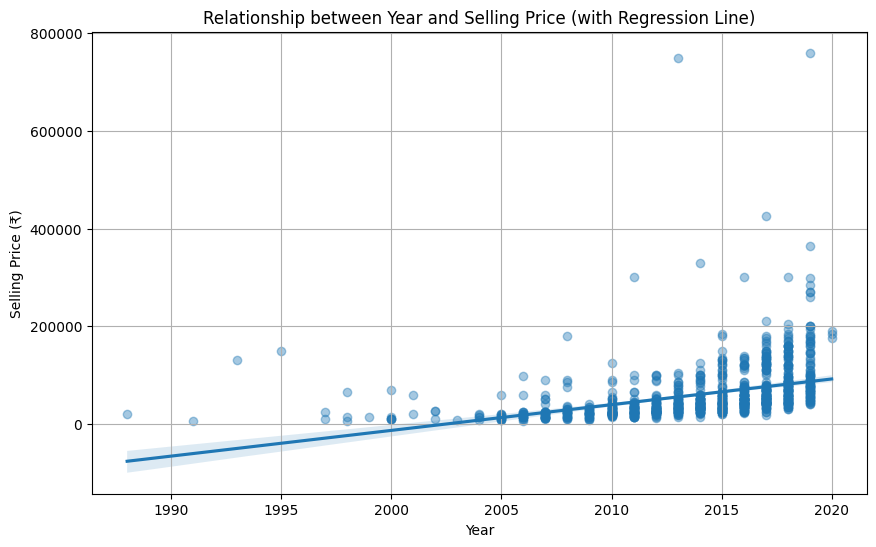


Correlation between Year and Selling Price: 0.40

Interpretation:
There is a weak or no strong linear relationship.


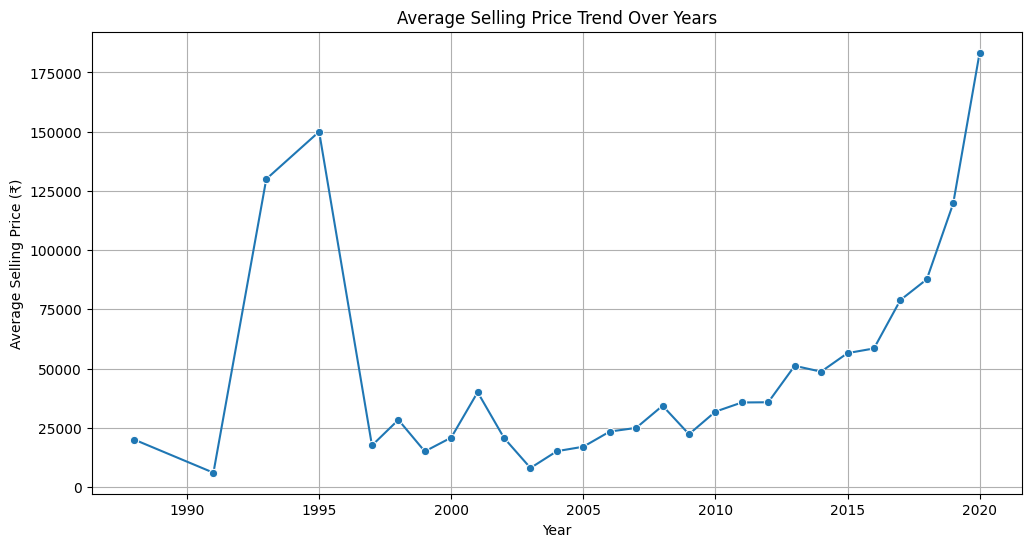


Average Selling Price by Year:
 year  selling_price
 1988   20000.000000
 1991    6000.000000
 1993  130000.000000
 1995  150000.000000
 1997   17500.000000
 1998   28333.333333
 1999   15000.000000
 2000   20833.333333
 2001   40000.000000
 2002   20666.666667
 2003    8000.000000
 2004   15100.000000
 2005   16978.571429
 2006   23380.000000
 2007   24927.586207
 2008   34289.285714
 2009   22267.857143
 2010   31793.333333
 2011   35655.721311
 2012   35748.400000
 2013   51136.986301
 2014   48668.131868
 2015   56500.000000
 2016   58469.018692
 2017   78894.736842
 2018   87660.374046
 2019  119689.511628
 2020  183333.333333


In [22]:
#  Q-12 Perform a bivariate analysis to visualize the relationship between year and selling_price.

import matplotlib.pyplot as plt


# Scatter plot to visualize the relationship between year and selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='year', y='selling_price', alpha=0.6)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price (₹)')
plt.grid(True)
plt.show()

# Optional: Use a regression plot to see the trend with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='year', y='selling_price', scatter_kws={'alpha':0.4})
plt.title('Relationship between Year and Selling Price (with Regression Line)')
plt.xlabel('Year')
plt.ylabel('Selling Price (₹)')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation_year_price = df['year'].corr(df['selling_price'])

print(f"\nCorrelation between Year and Selling Price: {correlation_year_price:.2f}")

# Interpretation:
# A correlation close to 1 indicates a strong positive linear relationship (as Year increases, Selling Price tends to increase).
# A correlation close to -1 indicates a strong negative linear relationship (as Year increases, Selling Price tends to decrease).
# A correlation close to 0 indicates a weak or no linear relationship.

print("\nInterpretation:")
if correlation_year_price > 0.5:
    print("There is a strong positive linear relationship: newer bikes tend to have higher selling prices.")
elif correlation_year_price < -0.5:
    print("There is a strong negative linear relationship: newer bikes tend to have lower selling prices (unlikely in this context).")
else:
    print("There is a weak or no strong linear relationship.")

# Also useful to look at the average selling price per year
avg_price_by_year = df.groupby('year')['selling_price'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_year, x='year', y='selling_price', marker='o')
plt.title('Average Selling Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price (₹)')
plt.grid(True)
plt.show()

print("\nAverage Selling Price by Year:")
print(avg_price_by_year.sort_values(by='year').to_string(index=False))

Average Selling Price and Estimated Depreciation by Bike Age (Current Year: 2023):
 bike_age  selling_price  depreciation_percentage
        3      183333.33                        0
        4      119689.51                        0
        5       87660.37                        0
        6       78894.74                        0
        7       58469.02                        0
        8       56500.00                        0
        9       48668.13                        0
       10       51136.99                        0
       11       35748.40                        0
       12       35655.72                        0
       13       31793.33                        0
       14       22267.86                        0
       15       34289.29                        0
       16       24927.59                        0
       17       23380.00                        0
       18       16978.57                        0
       19       15100.00                        0
       20        

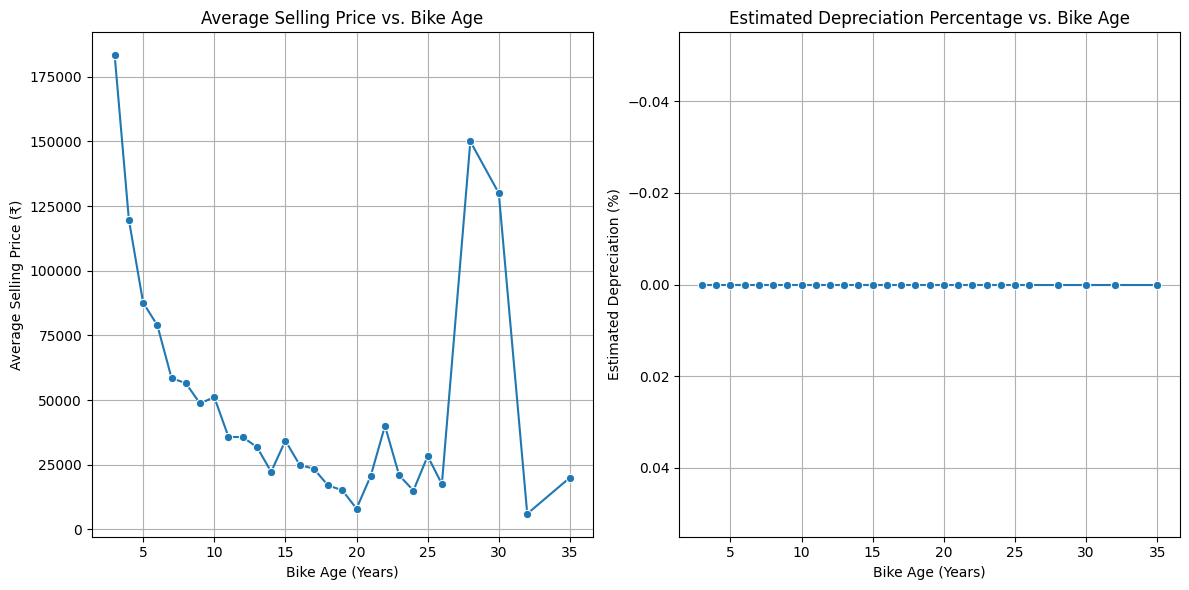

In [23]:
# Q-13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

import matplotlib.pyplot as plt
# Assume the current year is 2023 for calculation
current_year = 2023

# Calculate the age of the bike
df['bike_age'] = current_year - df['year']

# Group by bike age and calculate the average selling price for each age
avg_price_by_age = df.groupby('bike_age')['selling_price'].mean().reset_index()

# Calculate the 'depreciation' by comparing the average price at each age to the average price of the newest bikes (age 0 or 1)
# Let's take the average price of the newest bikes (age 0 or 1) as a reference point.
reference_price = avg_price_by_age[avg_price_by_age['bike_age'] <= 1]['selling_price'].mean()

# Calculate the percentage depreciation for each age
# Handle cases where reference_price might be zero or very small to avoid division errors.
if reference_price > 0:
    avg_price_by_age['depreciation_percentage'] = ((reference_price - avg_price_by_age['selling_price']) / reference_price) * 100
    # Clamp depreciation percentage to a minimum of 0
    avg_price_by_age['depreciation_percentage'] = avg_price_by_age['depreciation_percentage'].apply(lambda x: max(0, x))
else:
    avg_price_by_age['depreciation_percentage'] = 0 # Or some other appropriate handling

# Sort by bike age
avg_price_by_age = avg_price_by_age.sort_values(by='bike_age')

print(f"Average Selling Price and Estimated Depreciation by Bike Age (Current Year: {current_year}):")
print(avg_price_by_age.round(2).to_string(index=False))

# Visualize the average price and depreciation trend with age
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data=avg_price_by_age, x='bike_age', y='selling_price', marker='o')
plt.title('Average Selling Price vs. Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Average Selling Price (₹)')
plt.grid(True)

plt.subplot(1, 2, 2)
sns.lineplot(data=avg_price_by_age, x='bike_age', y='depreciation_percentage', marker='o')
plt.title('Estimated Depreciation Percentage vs. Bike Age')
plt.xlabel('Bike Age (Years)')
plt.ylabel('Estimated Depreciation (%)')
plt.grid(True)
plt.gca().invert_yaxis() # Invert y-axis to show increasing depreciation

plt.tight_layout()
plt.show()

Bikes priced significantly above the average for their manufacturing year (>1.5 std dev above mean):
                                      name  year  selling_price  price_difference_from_avg
                Harley-Davidson Street Bob  2013         750000                  698863.01
                           Suzuki GSX S750  2019         760000                  640310.49
            Kawasaki Ninja 650 [2018-2019]  2017         425000                  346105.26
                Harley-Davidson Street 750  2014         330000                  281331.87
            Kawasaki Ninja 650 [2018-2019]  2011         300000                  264344.28
                             Yamaha YZF R3  2019         365000                  245310.49
                        Kawasaki Ninja 300  2016         300000                  241530.98
                                BMW G310GS  2018         300000                  212339.63
          Royal Enfield Continental GT 650  2019         299000                 

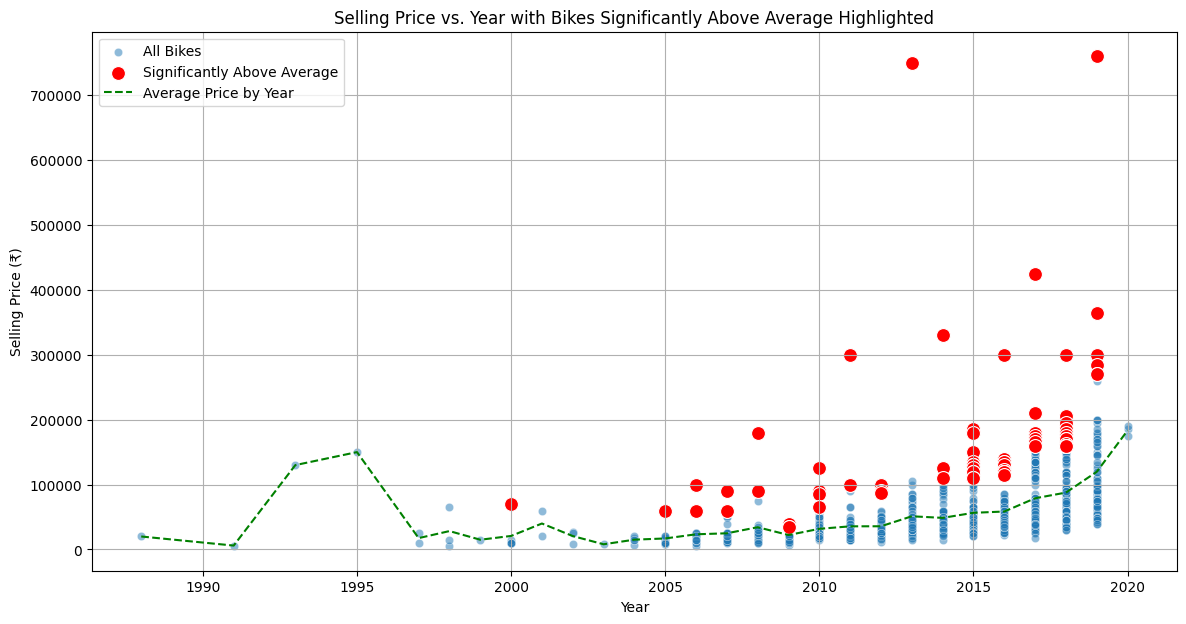

In [24]:
# Q-14 Which bike names are priced significantly above the average price for their manufacturing year?

import matplotlib.pyplot as plt

# Calculate average selling price per year
average_price_by_year = df.groupby('year')['selling_price'].transform('mean')

# Calculate the standard deviation of selling price per year
std_price_by_year = df.groupby('year')['selling_price'].transform('std')

# Define a threshold for "significantly above" (e.g., more than 1 standard deviation above the mean)
threshold_multiplier = 1.5 # You can adjust this multiplier

# Identify bikes where selling price is significantly above the average for their year
significantly_above_average = df[
    df['selling_price'] > average_price_by_year + threshold_multiplier * std_price_by_year
].copy()

# Sort the results by how far above the average they are
significantly_above_average['price_difference_from_avg'] = significantly_above_average['selling_price'] - average_price_by_year
significantly_above_average = significantly_above_average.sort_values(
    by='price_difference_from_avg', ascending=False
)

print(f"Bikes priced significantly above the average for their manufacturing year (>{threshold_multiplier} std dev above mean):")
print(significantly_above_average[['name', 'year', 'selling_price', 'price_difference_from_avg']].round(2).to_string(index=False))

# Optional: Visualize the bikes significantly above the average
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='year', y='selling_price', label='All Bikes', alpha=0.5)
sns.scatterplot(data=significantly_above_average, x='year', y='selling_price', color='red', label='Significantly Above Average', s=100)

# Add a line for the average price per year
avg_price_per_year_df = df.groupby('year')['selling_price'].mean().reset_index()
sns.lineplot(data=avg_price_per_year_df, x='year', y='selling_price', color='green', linestyle='--', label='Average Price by Year')


plt.title('Selling Price vs. Year with Bikes Significantly Above Average Highlighted')
plt.xlabel('Year')
plt.ylabel('Selling Price (₹)')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Q-15 Develop a correlation matrix for numeric columns and visualize it using a heatmap.

import matplotlib.pyplot as plt
import numpy as np
# Select only the numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=np.number)

# Drop the calculated 'bike_age' and potentially 'km_driven_cleaned' or other calculated columns if they are not needed for the core correlation matrix
# Assuming we want correlation between original numeric features year, selling_price, ex_showroom_price and the cleaned km_driven
numeric_for_corr = df[['year', 'selling_price', 'km_driven_cleaned', 'ex_showroom_price']].copy()

# Drop rows with NaN values in these specific columns if necessary for correlation calculation
# (corr() function handles NaNs by default, but it's good practice if you plan other analyses)
numeric_for_corr.dropna(inplace=True)


# Calculate the correlation matrix
correlation_matrix = numeric_for_corr.corr()

print("Correlation Matrix for Numeric Columns:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Correlation Matrix for Numeric Columns:
                       year  selling_price  km_driven_cleaned  \
year               1.000000       0.350654          -0.329823   
selling_price      0.350654       1.000000          -0.194093   
km_driven_cleaned -0.329823      -0.194093           1.000000   
ex_showroom_price  0.126378       0.918583          -0.122011   

                   ex_showroom_price  
year                        0.126378  
selling_price               0.918583  
km_driven_cleaned          -0.122011  
ex_showroom_price           1.000000  


#EDA - 2#

**Title: Car Sale Dataset**

In [26]:
from google.colab import files
uploaded = files.upload()

Saving Car Sale.csv to Car Sale.csv


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('Car Sale.csv')

Dealer_Name
U-Haul CO                28769.919006
Classic Chevy            28602.014446
Rabun Used Car Sales     28527.536177
Iceberg Rentals          28522.958533
Enterprise Rent A Car    28312.580800
Name: Price ($), dtype: float64


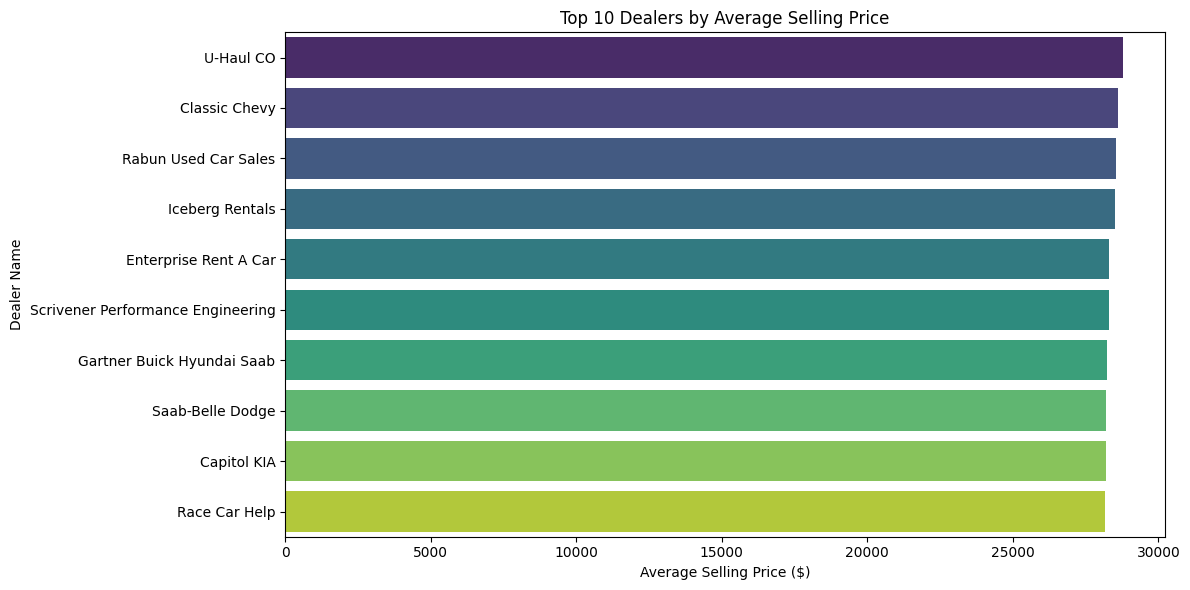

In [36]:
# Q-1 What is the average selling price of cars for each dealer, and how does it compare across different dealers?

# Load the data
df = pd.read_csv('Car Sale.csv', encoding='utf-8')

# Clean column names (remove trailing spaces)
df.columns = [col.strip() for col in df.columns]

# Group by Dealer_Name and calculate average price
avg_price_by_dealer = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)

# Show the head of the result
print(avg_price_by_dealer.head())

# Plot the average price by dealer (top 10 for clarity)
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price_by_dealer.head(10).values, y=avg_price_by_dealer.head(10).index, palette='viridis')
plt.xlabel('Average Selling Price ($)')
plt.ylabel('Dealer Name')
plt.title('Top 10 Dealers by Average Selling Price')
plt.tight_layout()
plt.show()

In [37]:
 # Q-2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

 # Calculate the standard deviation of prices for each car brand (Company)
# This will show which brand has the highest price variation

# Group by Company and calculate std deviation of Price
price_std_by_company = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)

# Show the top 5 brands with the highest price variation
print(price_std_by_company.head())

# Plot the top 10 brands by price variation
plt.figure(figsize=(12,6))
sns.barplot(x=price_std_by_company.head(10).values, y=price_std_by_company.head(10).index, palette='magma')
plt.xlabel('Standard Deviation of Price ($)')
plt.ylabel('Car Brand (Company)')
plt.title('Top 10 Car Brands by Price Variation')
plt.tight_layout()
plt.show()

Company
Lincoln     19658.050211
Saab        19653.740089
Cadillac    19517.120220
Plymouth    19065.997338
Lexus       17852.923492
Name: Price ($), dtype: float64


['Auto' 'Manual']
                count          mean           std     min      25%      50%  \
Transmission                                                                  
Auto          12571.0  28248.525972  13747.070597  1200.0  19000.0  24000.0   
Manual        11335.0  27914.710631  15862.871978  1700.0  17000.0  22001.0   

                  75%      max  
Transmission                    
Auto          35500.0  75700.0  
Manual        34000.0  85800.0  
                  IQR
Transmission         
Auto          16500.0
Manual        17000.0


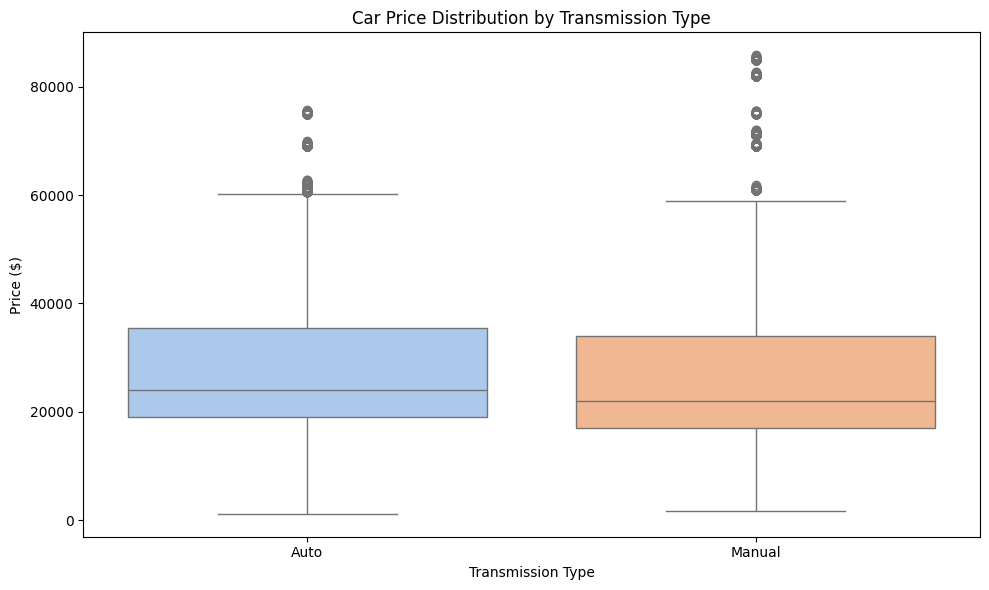

In [38]:
#Q-3  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

# We'll analyze the distribution of car prices for each transmission type and compare their interquartile ranges (IQR).
# First, let's look at the unique transmission types and basic stats.

trans_types = df['Transmission'].unique()
print(trans_types)

# Describe price distribution for each transmission type
price_by_trans = df.groupby('Transmission')['Price ($)'].describe()
print(price_by_trans)

# Calculate IQR for each transmission type
price_by_trans['IQR'] = price_by_trans['75%'] - price_by_trans['25%']
print(price_by_trans[['IQR']])

# Visualize the price distribution with boxplots
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Transmission', y='Price ($)', palette='pastel')
plt.title('Car Price Distribution by Transmission Type')
plt.ylabel('Price ($)')
plt.xlabel('Transmission Type')
plt.tight_layout()
plt.show()

In [41]:
 #Q-4 What is the distribution of car prices across different regions?

 # Analyze the distribution of car prices across Dealer_Region
# Show summary statistics and a boxplot for price distribution by region

# Get summary statistics for each region
region_price_stats = df.groupby('Dealer_Region')['Price ($)'].describe()
print(region_price_stats)

# Visualize the price distribution for each region using boxplots (show top 10 regions by count for clarity)
top_regions = df['Dealer_Region'].value_counts().head(10).index
top_regions_data = df[df['Dealer_Region'].isin(top_regions)]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.boxplot(data=top_regions_data, x='Dealer_Region', y='Price ($)', palette='coolwarm')
plt.title('Car Price Distribution by Top 10 Regions')
plt.ylabel('Price ($)')
plt.xlabel('Dealer Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')
Distribution of Cars by Body Style:
Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


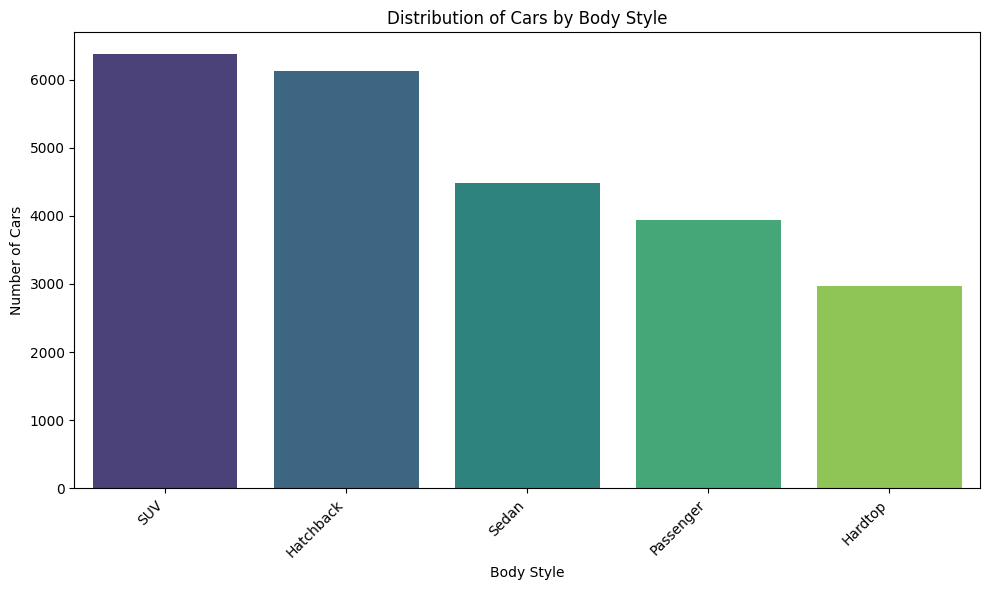

In [44]:
#Q-5 What is the distribution of cars based on body styles?

import matplotlib.pyplot as plt
import seaborn as sns # Ensure seaborn is imported if used for plotting

# Analyze the distribution (counts) of cars for each Body_Style.
# This shows which body styles are most common in the dataset.

# Print column names to identify the correct column name
print(df.columns)

# Count the occurrences of each body style
# Replace 'Body_Style' with the correct column name if it's different based on the print output
body_style_counts = df['Body Style'].value_counts()

print("Distribution of Cars by Body Style:")
print(body_style_counts)

# Visualize the distribution with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='viridis')
plt.title('Distribution of Cars by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout()
plt.show()

In [54]:
# Q-6 How does the average selling price of cars vary by customer gender and annual income
# Grouping the data by Gender and calculating the average selling price and annual income
average_price_income_gender = df.groupby(['Gender'])[['Price ($)', 'Annual Income']].mean().reset_index()

# Display the results
average_price_income_gender


Gender     Price ($)  Annual Income
0  Female  28277.265270  755973.021339
1    Male  28039.429407  851184.044207

In [55]:
#Q-7 What is the distribution of car prices by region, and how does the number of cars sold vary by region?
# Grouping the data by Dealer Region to calculate the total number of cars sold and the average price
region_distribution = df.groupby('Dealer_Region').agg({'Price ($)': 'mean', 'Car_id': 'count'}).reset_index()
region_distribution.columns = ['Dealer Region', 'Average Price ($)', 'Number of Cars Sold']

# Display the results
region_distribution



Dealer Region  Average Price ($)  Number of Cars Sold
0        Aurora       28334.626837                 3130
1        Austin       28341.603628                 4135
2    Greenville       28180.819054                 3128
3    Janesville       27833.350955                 3821
4    Middletown       27856.338875                 3128
5         Pasco       28119.039923                 3131
6    Scottsdale       27954.958928                 3433

In [56]:
# Q-8  How does the average car price differ between cars with different engine sizes?

# Grouping the data by Engine size to calculate the average car price
average_price_by_engine = df.groupby('Engine').agg({'Price ($)': 'mean'}).reset_index()
average_price_by_engine.columns = ['Engine Size', 'Average Price ($)']

# Display the results
average_price_by_engine

Engine Size  Average Price ($)
0  DoubleÂ Overhead Camshaft       28248.525972
1          Overhead Camshaft       27914.710631

In [57]:
 #Q-9 How do car prices vary based on the customer’s annual income bracket?+
# Creating income brackets for the annual income
bins = [0, 50000, 100000, 150000, 200000, 250000, 300000, 400000, 500000, 1000000]
labels = ['<50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-400k', '400k-500k', '500k+']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=bins, labels=labels, right=False)

# Grouping the data by Income Bracket to calculate the average car price
average_price_by_income_bracket = df.groupby('Income Bracket').agg({'Price ($)': 'mean'}).reset_index()
average_price_by_income_bracket.columns = ['Income Bracket', 'Average Price ($)']

# Display the results
average_price_by_income_bracket


Income Bracket  Average Price ($)
0           <50k       27884.297820
1       50k-100k       43000.000000
2      100k-150k       23200.200000
3      150k-200k       17500.444444
4      200k-250k       35913.217391
5      250k-300k       28161.365079
6      300k-400k       28648.699842
7      400k-500k       28434.748086
8          500k+       27987.008477

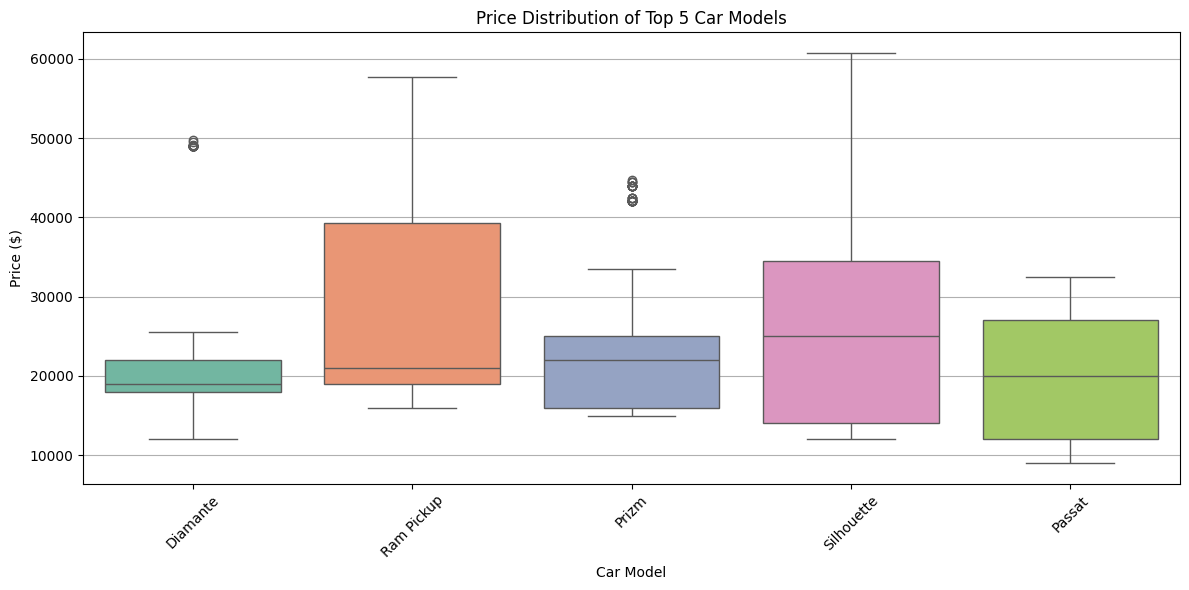

In [63]:
#Q-10  What are the top 5 car models with the highest number of sales, and how does their price distribution look?

# Grouping the data by Car Model to calculate the number of sales
top_models = df.groupby('Model').agg({'Car_id': 'count', 'Price ($)': 'mean'}).reset_index()
top_models.columns = ['Car Model', 'Number of Sales', 'Average Price ($)']

# Sorting the models by number of sales and selecting the top 5
top_5_models = top_models.sort_values(by='Number of Sales', ascending=False).head(5)

# Display the top 5 car models
top_5_models

import seaborn as sns
import matplotlib.pyplot as plt

# Filtering the original dataframe for the top 5 models
top_5_model_names = top_5_models['Car Model'].tolist()
filtered_df = df[df['Model'].isin(top_5_model_names)]

# Creating a boxplot to visualize the price distribution of the top 5 car models
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_df, x='Model', y='Price ($)', palette='Set2')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [64]:
#Q-11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?
# Grouping the data by Engine size and Color to calculate the average car price
price_by_engine_color = df.groupby(['Engine', 'Color']).agg({'Price ($)': 'mean'}).reset_index()

# Calculating the price variation for each color
price_variation = df.groupby('Color')['Price ($)'].std().reset_index()
price_variation.columns = ['Color', 'Price Variation']

# Merging the average price data with the price variation data
merged_data = price_by_engine_color.merge(price_variation, on='Color')

# Display the merged data
merged_data

# Identifying the colors with the highest price variation
highest_variation_colors = price_variation.sort_values(by='Price Variation', ascending=False).head(5)

# Display the highest variation colors
highest_variation_colors

Color  Price Variation
2         Red     15519.360962
0       Black     15286.065976
1  Pale White     14077.346859

In [65]:
#Q-12  Is there any seasonal trend in car sales based on the date of sale?

# The correct column for the sale date is 'Date'. I will convert this column to datetime format.
df['Date'] = pd.to_datetime(df['Date'])

# Extracting the month from the Sale Date
df['Month'] = df['Date'].dt.month

# Grouping the data by month to calculate the number of sales
monthly_sales = df.groupby('Month').agg({'Car_id': 'count'}).reset_index()
monthly_sales.columns = ['Month', 'Number of Sales']

# Display the monthly sales data
monthly_sales

Month  Number of Sales
0       1              790
1       2              735
2       3             1535
3       4             1655
4       5             1895
5       6             1715
6       7             1725
7       8             1705
8       9             3305
9      10             1830
10     11             3470
11     12             3546

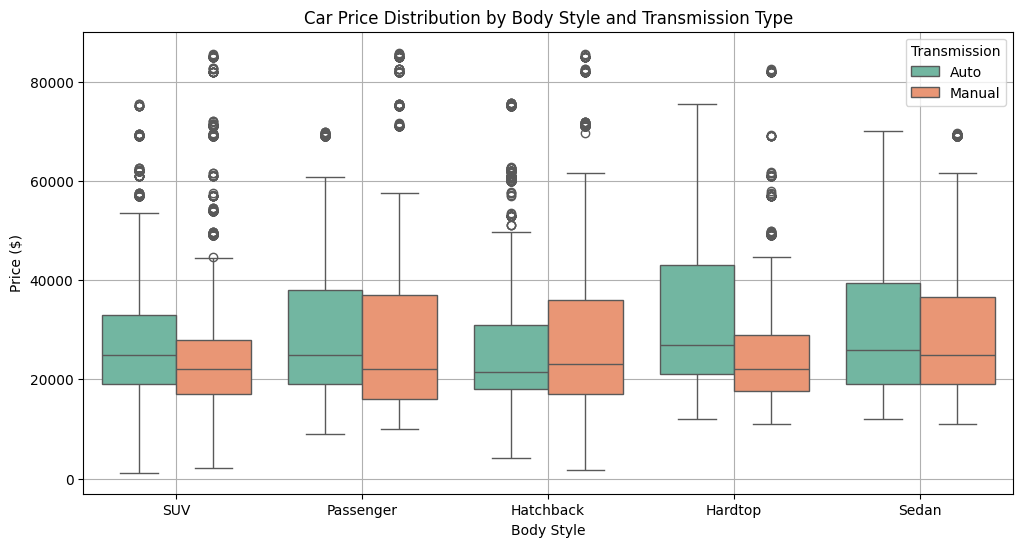

In [67]:
#Q-13 How does the car price distribution change when considering different combinations of body style and transmission type?
# Grouping the data by Body Style and Transmission Type to calculate the average car price
price_by_body_transmission = df.groupby(['Body Style', 'Transmission']).agg({'Price ($)': 'mean'}).reset_index()

# Display the average price data for different combinations of body style and transmission type
price_by_body_transmission

# Creating a boxplot to visualize the price distribution based on Body Style and Transmission Type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Body Style', y='Price ($)', hue='Transmission', palette='Set2')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.legend(title='Transmission')
plt.grid(True)
plt.show()

Correlation Matrix:
               Price ($)  Annual Income
Price ($)       1.000000       0.012065
Annual Income   0.012065       1.000000


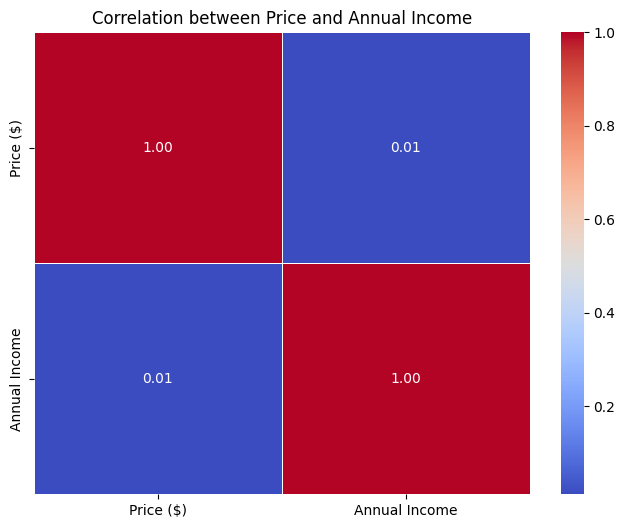

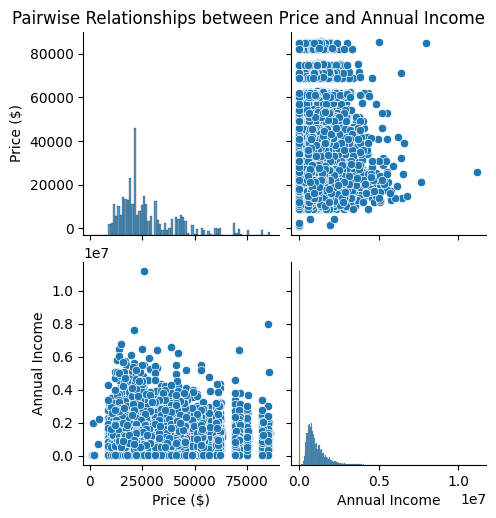

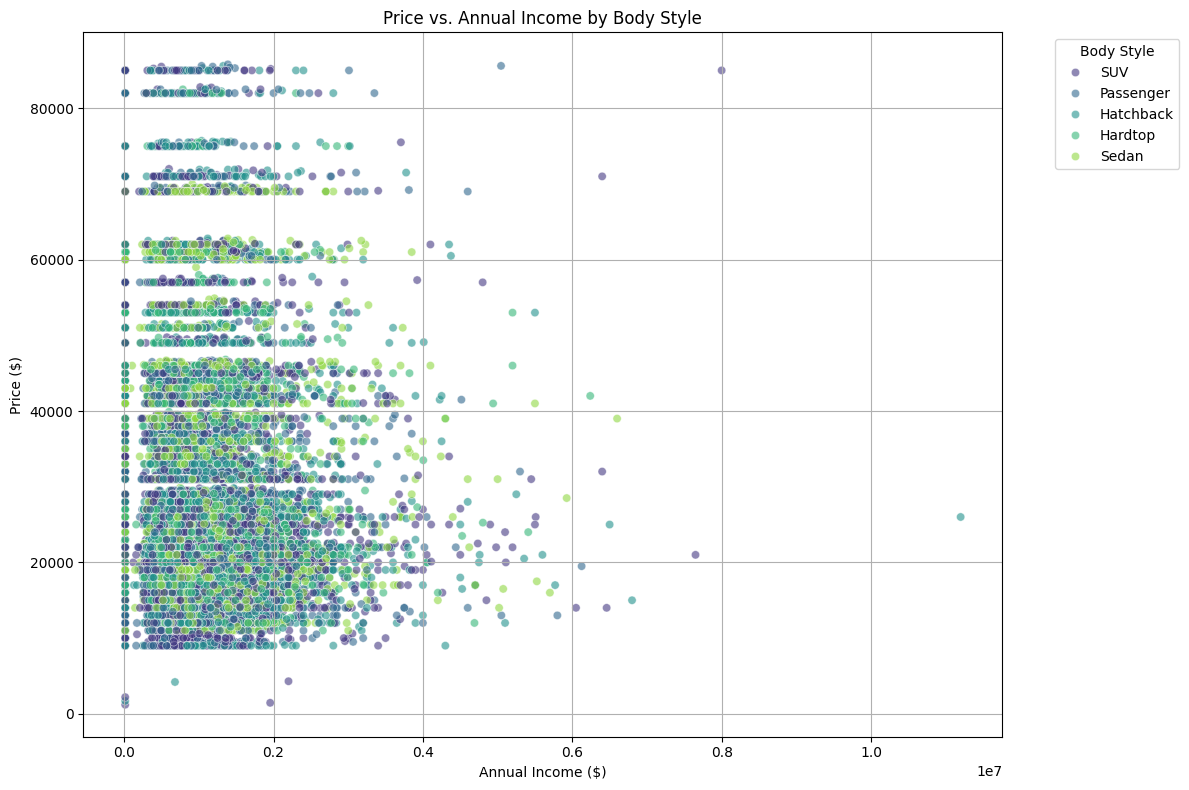


Summary of Correlation and Interactions:
- The correlation matrix shows the linear relationship between Price and Annual Income.
  - Price and Annual Income correlation: 0.01
- Positive correlation suggests that as one variable increases, the other tends to increase.
- Negative correlation suggests that as one variable increases, the other tends to decrease.
- The scatter plot visually represents this relationship.
- The scatter plot colored by Body Style can help identify if the relationship between Price and Annual Income visually changes for different body styles, suggesting an interaction effect.


In [70]:


# Q-14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Ensure seaborn is imported for plotting
import numpy as np # Ensure numpy is imported for np.nan

# Select the relevant *numeric* columns for correlation analysis
# The 'Engine' column seems to contain categorical data (engine types), not numerical size.
# We will remove 'Engine' from the correlation calculation.
correlation_data = df[['Price ($)', 'Annual Income']].copy()

# Ensure data types are numeric (Price ($) and Annual Income)
# Although they appear numeric based on previous use, it's good practice to handle potential issues.
# We'll use errors='coerce' to turn non-numeric values into NaN.
correlation_data['Price ($)'] = pd.to_numeric(correlation_data['Price ($)'], errors='coerce')
correlation_data['Annual Income'] = pd.to_numeric(correlation_data['Annual Income'], errors='coerce')

# Drop rows with any missing values in these columns before calculating correlation
correlation_data.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Price and Annual Income')
plt.show()

# To understand interactions, we can visualize relationships using scatter plots or pair plots
# Pair plot for pairwise relationships (now just Price and Annual Income)
sns.pairplot(correlation_data)
plt.suptitle('Pairwise Relationships between Price and Annual Income', y=1.02)
plt.show()

# Scatter plot with regression line to see the trend
plt.figure(figsize=(10, 6))
sns.regplot(data=correlation_data, x='Annual Income', y='Price ($)', scatter_kws={'alpha':0.4})
plt.title('Price vs. Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()


# Additional analysis for interaction: How does the relationship between Price and Annual Income differ based on Body Style?
# This requires bringing the 'Body Style' column back and visualizing the relationship.

# Ensure 'Body Style' column is available
if 'Body Style' in df.columns:
    # Visualize Price vs. Annual Income colored by Body Style
    plt.figure(figsize=(12, 8))
    # Drop rows with missing values in the relevant columns for plotting
    plot_data = df[['Price ($)', 'Annual Income', 'Body Style']].dropna().copy()
    plot_data['Price ($)'] = pd.to_numeric(plot_data['Price ($)'], errors='coerce')
    plot_data['Annual Income'] = pd.to_numeric(plot_data['Annual Income'], errors='coerce')
    plot_data.dropna(inplace=True) # Drop NaNs introduced by coercion


    sns.scatterplot(data=plot_data, x='Annual Income', y='Price ($)', hue='Body Style', palette='viridis', alpha=0.6)
    plt.title('Price vs. Annual Income by Body Style')
    plt.xlabel('Annual Income ($)')
    plt.ylabel('Price ($)')
    plt.legend(title='Body Style', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("'Body Style' column not found in the DataFrame. Cannot visualize Price vs. Annual Income by Body Style.")


# Summary of findings from the correlation matrix and visualizations:
print("\nSummary of Correlation and Interactions:")
print("- The correlation matrix shows the linear relationship between Price and Annual Income.")
print(f"  - Price and Annual Income correlation: {correlation_matrix.loc['Price ($)', 'Annual Income']:.2f}")
print("- Positive correlation suggests that as one variable increases, the other tends to increase.")
print("- Negative correlation suggests that as one variable increases, the other tends to decrease.")
print("- The scatter plot visually represents this relationship.")
print("- The scatter plot colored by Body Style can help identify if the relationship between Price and Annual Income visually changes for different body styles, suggesting an interaction effect.")
# Further statistical analysis (e.g., regression analysis with interaction terms) would be needed for a more rigorous assessment of interactions.

In [72]:
#Q-15 How does the average car price vary across different car models and engine types?

import matplotlib.pyplot as plt
# The 'Engine' column in the Car Sale dataset seems to represent engine *types* or configurations (e.g., '1.5L', '2.0L'), not a continuous numerical size that can be directly used for correlation in the same way as numerical columns like 'Price' or 'Annual Income'.
# We need to treat 'Engine' as a categorical variable to see how average price varies *by* engine type.

# Group by 'Engine' and calculate the average price
average_price_by_engine_type = df.groupby('Engine')['Price ($)'].mean().reset_index()
average_price_by_engine_type.columns = ['Engine Type', 'Average Price ($)']

# Sort by average price to see which engine types are associated with higher/lower prices
average_price_by_engine_type = average_price_by_engine_type.sort_values(by='Average Price ($)', ascending=False)

print("Average Car Price by Engine Type:")
print(average_price_by_engine_type)

# Visualize the average price by engine type (show top N for clarity if there are many)
# Let's show the top 15 engine types by average price
top_n = 15
plt.figure(figsize=(12, 8))
sns.barplot(data=average_price_by_engine_type.head(top_n), x='Average Price ($)', y='Engine Type', palette='viridis')
plt.title(f'Average Car Price by Engine Type (Top {top_n})')
plt.xlabel('Average Price ($)')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.show()


# If the question implies variation across *different car models* AND *engine types*, we need to group by both.
# This will give the average price for each specific combination of Model and Engine Type.

# Group by Model and Engine and calculate the average price
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
average_price_by_model_engine.columns = ['Car Model', 'Engine Type', 'Average Price ($)']

# Display the result (it will likely be a large table)
print("\nAverage Car Price by Model and Engine Type:")
print(average_price_by_model_engine.head()) # Print just the head as it can be very long

# To visualize this effectively, we might look at specific models or use facets.
# Example: Look at the variation for a few popular models across their engine types.
# Let's pick the top 3 models by sale count (from previous Q-10 analysis if available)
# Or just pick a few common models from the dataset

# Let's identify a few models with multiple engine types
models_with_multiple_engines = average_price_by_model_engine.groupby('Car Model').filter(lambda x: len(x) > 1)['Car Model'].unique()

if len(models_with_multiple_engines) > 0:
    print(f"\nExamining Price Variation for models with multiple engine types (e.g., {', '.join(models_with_multiple_engines[:3])}):")

    # Filter the grouped data for a few example models
    example_models = models_with_multiple_engines[:3] # Take the first 3
    plot_data_model_engine = average_price_by_model_engine[average_price_by_model_engine['Car Model'].isin(example_models)]

    # Create a bar plot for each selected model showing average price per engine type
    g = sns.catplot(
        data=plot_data_model_engine, kind="bar",
        x="Engine Type", y="Average Price ($)", col="Car Model",
        palette="pastel", height=5, aspect=.8
    )
    g.fig.suptitle('Average Car Price by Engine Type for Selected Models', y=1.03)
    g.set_axis_labels("Engine Type", "Average Price ($)")
    g.set_titles("Model: {col_name}")
    g.set_xticklabels(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo car models found with multiple engine types in the dataset to show price variation.")

# Summary interpretation:
print("\nInterpretation:")
print("- The first analysis shows the overall average price associated with each engine type across all models.")
print("- The second analysis (grouping by Model and Engine) shows the average price for specific combinations.")
print("- By examining the second result or the faceted plot, you can see if a specific car model (e.g., 'Camry') has different average prices depending on whether it has a '2.5L' engine vs. a '3.5L' engine, illustrating how price varies across model and engine type.")
print("- Large differences in average price within a single model across different engine types indicate that engine choice significantly impacts the price for that model.")

Average Car Price by Engine Type:
                 Engine Type  Average Price ($)
0  DoubleÂ Overhead Camshaft       28248.525972
1          Overhead Camshaft       27914.710631



Average Car Price by Model and Engine Type:
  Car Model                Engine Type  Average Price ($)
0     3-Sep  DoubleÂ Overhead Camshaft       37986.380117
1    3000GT  DoubleÂ Overhead Camshaft       22764.326923
2    3000GT          Overhead Camshaft       21770.659864
3      300M  DoubleÂ Overhead Camshaft       21394.888889
4      323i  DoubleÂ Overhead Camshaft       16744.632287

Examining Price Variation for models with multiple engine types (e.g., 3000GT, 323i, 328i):



Interpretation:
- The first analysis shows the overall average price associated with each engine type across all models.
- The second analysis (grouping by Model and Engine) shows the average price for specific combinations.
- By examining the second result or the faceted plot, you can see if a specific car model (e.g., 'Camry') has different average prices depending on whether it has a '2.5L' engine vs. a '3.5L' engine, illustrating how price varies across model and engine type.
- Large differences in average price within a single model across different engine types indicate that engine choice significantly impacts the price for that model.


#EDA - 3#

**Amazon Sales Data**

In [73]:
from google.colab import files
uploaded = files.upload()

Saving amazon.csv to amazon.csv


In [75]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('amazon.csv')



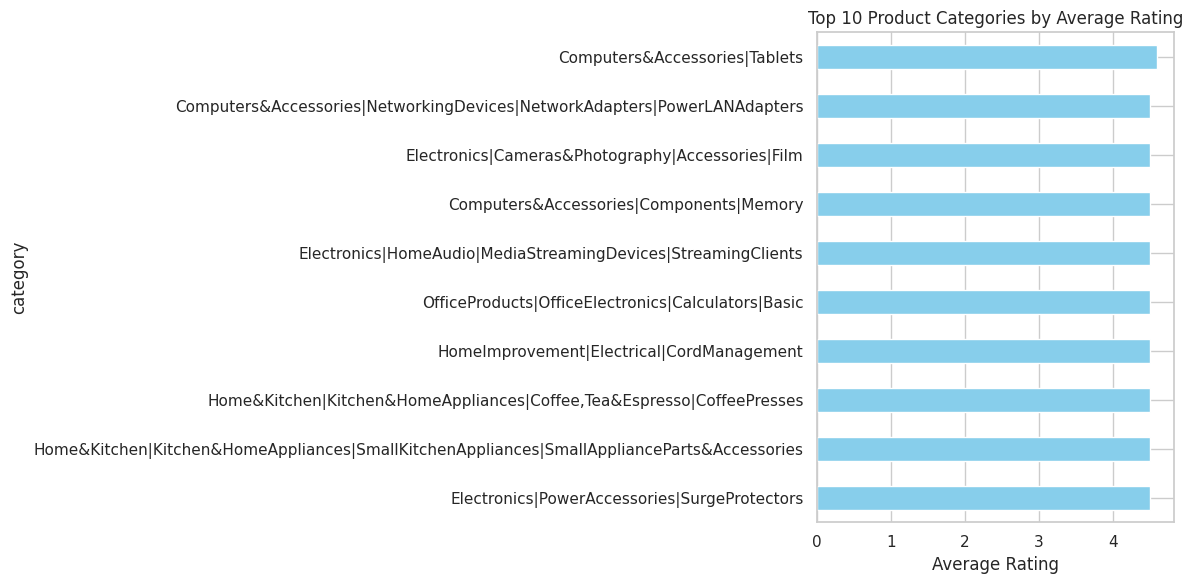

Average ratings exported to 'average_rating_by_category.csv'


In [77]:
#Q-1 What is the average rating for each product category?
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('amazon.csv')

# Clean and convert necessary columns
df['discounted_price'] = df['discounted_price'].replace('[₹,]', '', regex=True).astype(float)
df['actual_price'] = df['actual_price'].replace('[₹,]', '', regex=True).astype(float)
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Calculate average rating per category
average_rating_per_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# Plot top 10 categories
plt.figure(figsize=(12, 6))
average_rating_per_category.head(10).plot(kind='barh', color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 10 Product Categories by Average Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Plot bottom 10 categories
plt.figure(figsize=(12, 6))
average_rating_per_category.tail(10).plot(kind='barh', color='salmon')
plt.xlabel('Average Rating')
plt.title('Bottom 10 Product Categories by Average Rating')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Export to CSV
average_rating_per_category.to_csv('average_rating_by_category.csv')
print("Average ratings exported to 'average_rating_by_category.csv'")


In [78]:
#Q-2 What are the top rating_count products by category?

import matplotlib.pyplot as plt
# Group by category and sum the rating_count
category_rating_counts = df.groupby('category')['rating_count'].sum().sort_values(ascending=False)

print("Top rating_count products by category:")
print(category_rating_counts.head())

# Optional: Visualize the top N categories by total rating count
top_n = 10 # Display top 10 categories
plt.figure(figsize=(12, 7))
category_rating_counts.head(top_n).plot(kind='barh', color='lightgreen')
plt.xlabel('Total Rating Count')
plt.ylabel('Category')
plt.title(f'Top {top_n} Product Categories by Total Rating Count')
plt.gca().invert_yaxis() # Highest count at the top
plt.tight_layout()
plt.show()

Top rating_count products by category:
category
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                         4204939.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables    3547816.0
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                 2493269.0
Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables                       1906054.0
Electronics|WearableTechnology|SmartWatches                                          1644476.0
Name: rating_count, dtype: float64


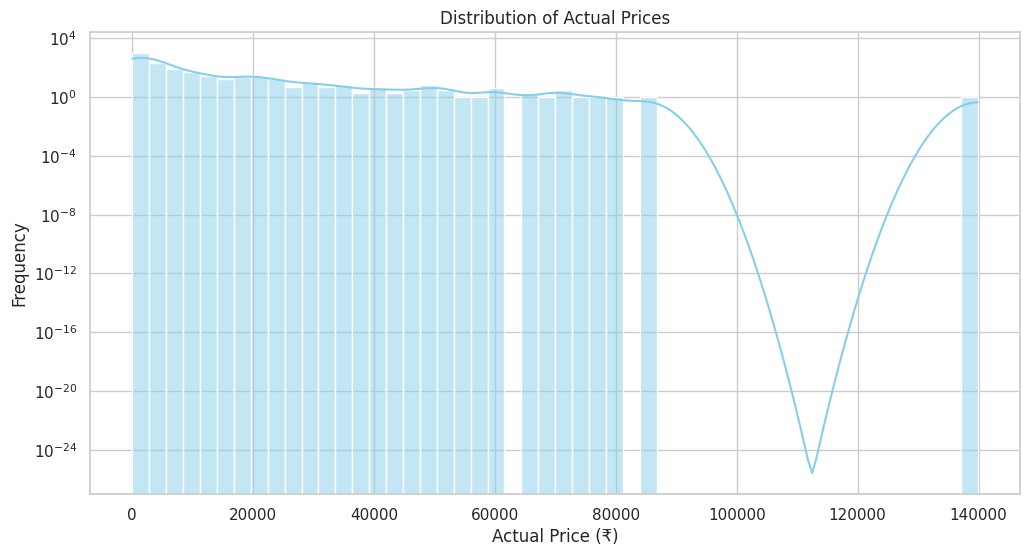

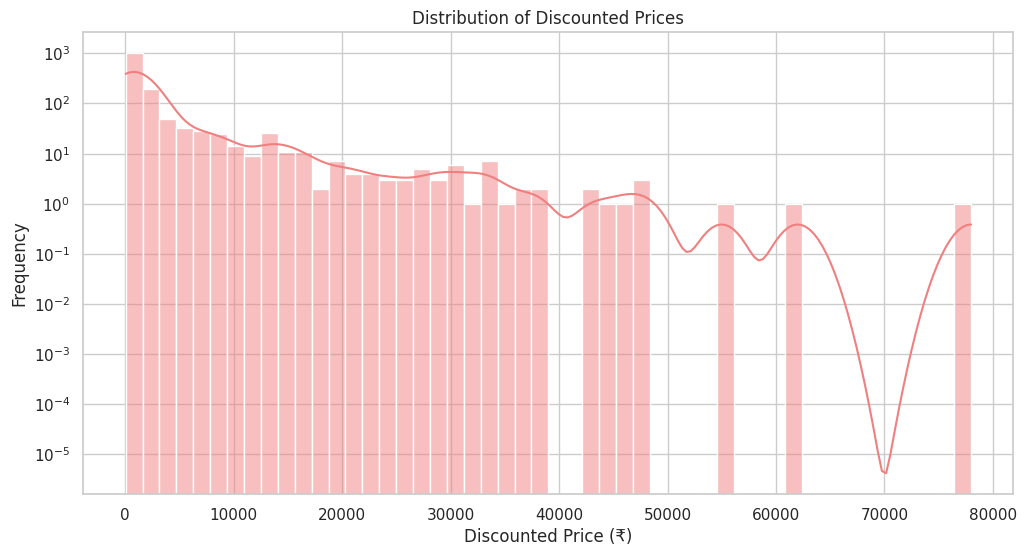

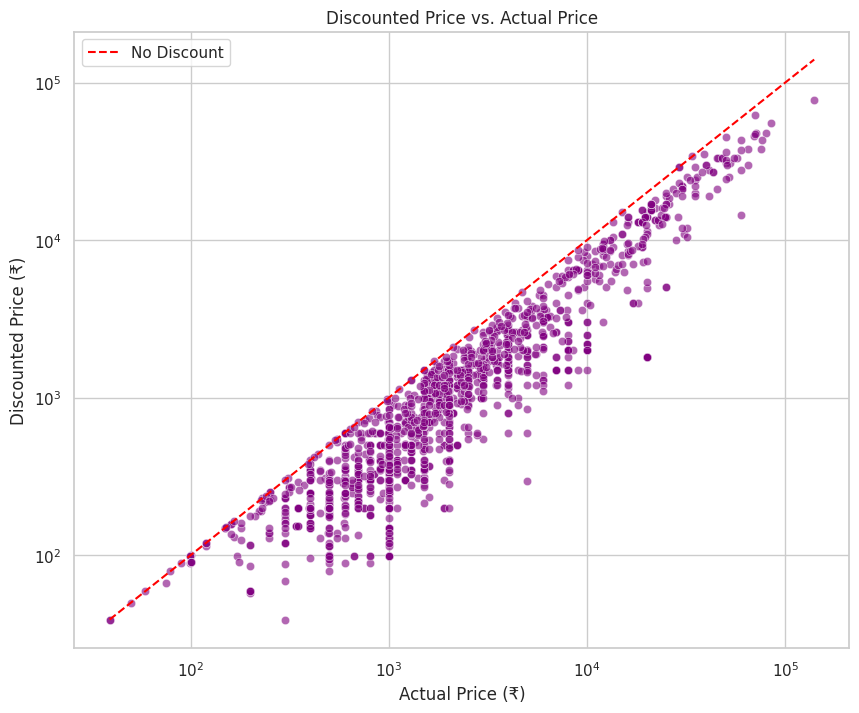

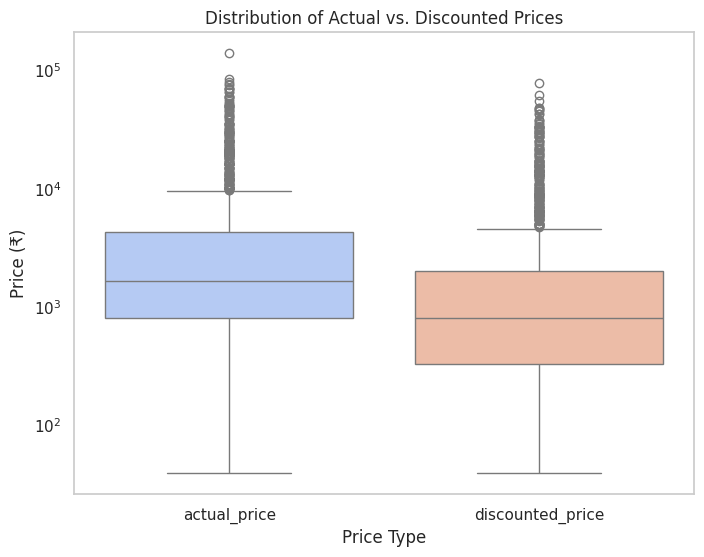


Summary Statistics for Actual vs. Discounted Prices:
        actual_price  discounted_price
count    1465.000000       1465.000000
mean     5444.990635       3125.310874
std     10874.826864       6944.304394
min        39.000000         39.000000
25%       800.000000        325.000000
50%      1650.000000        799.000000
75%      4295.000000       1999.000000
max    139900.000000      77990.000000


In [79]:
#Q-3 What is the distribution of discounted prices vs. actual prices?

import matplotlib.pyplot as plt
# Calculate the discount amount and the discount percentage
df['discount_amount'] = df['actual_price'] - df['discounted_price']
df['calculated_discount_percentage'] = (df['discount_amount'] / df['actual_price']) * 100

# Plot the distribution of actual prices
plt.figure(figsize=(12, 6))
sns.histplot(df['actual_price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Actual Prices')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale if there is a wide range of prices
plt.grid(True)
plt.show()

# Plot the distribution of discounted prices
plt.figure(figsize=(12, 6))
sns.histplot(df['discounted_price'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Discounted Prices')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Frequency')
plt.yscale('log') # Use log scale if there is a wide range of prices
plt.grid(True)
plt.show()

# Scatter plot to show the relationship between actual and discounted prices
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='actual_price', y='discounted_price', alpha=0.6, color='purple')
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Actual Price (₹)')
plt.ylabel('Discounted Price (₹)')
plt.xscale('log') # Use log scale if there is a wide range
plt.yscale('log') # Use log scale if there is a wide range
plt.grid(True)

# Add a line where discounted_price == actual_price (no discount)
plt.plot([df['actual_price'].min(), df['actual_price'].max()], [df['actual_price'].min(), df['actual_price'].max()], color='red', linestyle='--', label='No Discount')
plt.legend()
plt.show()

# Box plot to compare distributions side-by-side
# Melt the DataFrame to have actual and discounted prices in a single column for easier plotting
price_melted = df.melt(value_vars=['actual_price', 'discounted_price'], var_name='Price Type', value_name='Price')

plt.figure(figsize=(8, 6))
sns.boxplot(data=price_melted, x='Price Type', y='Price', palette='coolwarm')
plt.title('Distribution of Actual vs. Discounted Prices')
plt.xlabel('Price Type')
plt.ylabel('Price (₹)')
plt.yscale('log') # Use log scale for better visualization if there are outliers
plt.grid(axis='y')
plt.show()

# Summary statistics for comparison
print("\nSummary Statistics for Actual vs. Discounted Prices:")
print(df[['actual_price', 'discounted_price']].describe())

Average Discount Percentage by Category:
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                            90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                    90.0
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                   90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                   88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers         87.5
                                                                                                                      ... 
OfficeProducts|OfficeElectronics|Calculators|Financial&Business                                                        0.0
OfficeProducts|OfficePaperProducts|Paper|Copy&PrintingPaper|ColouredPaper                

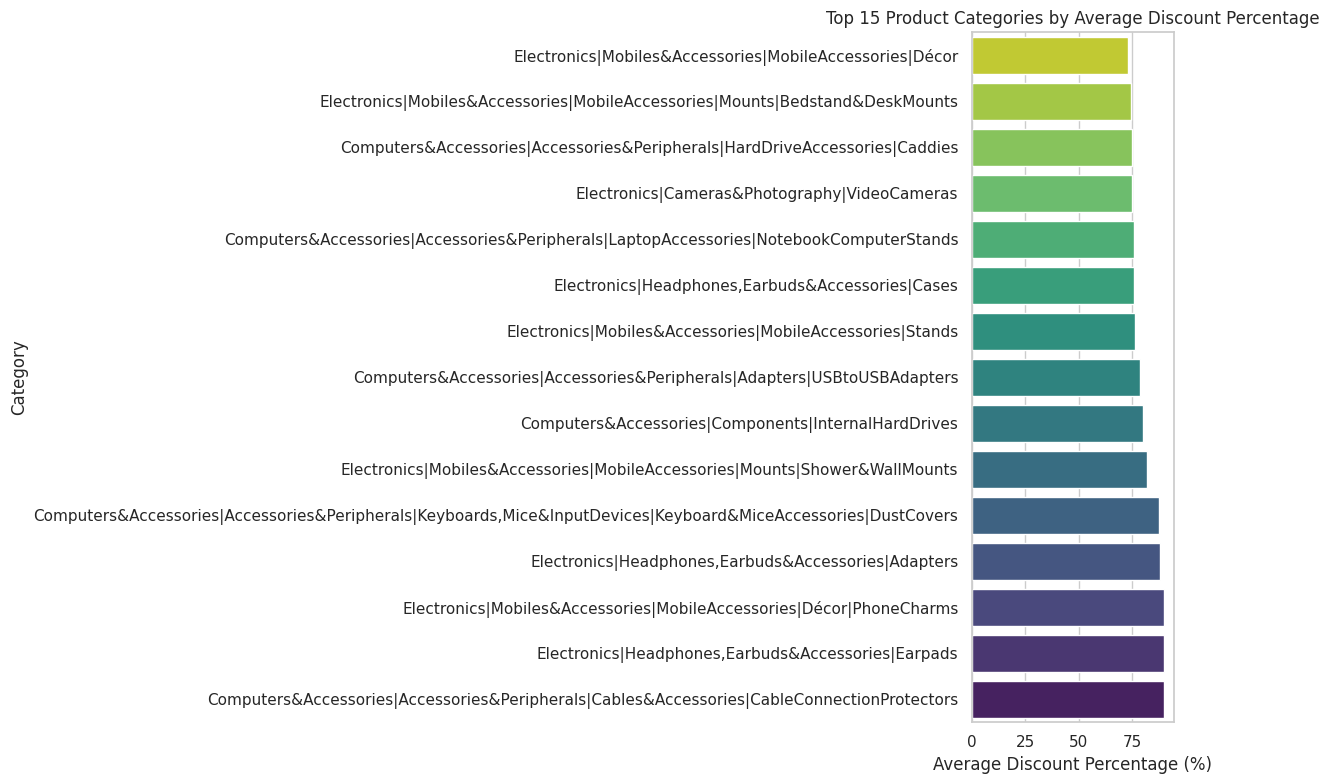

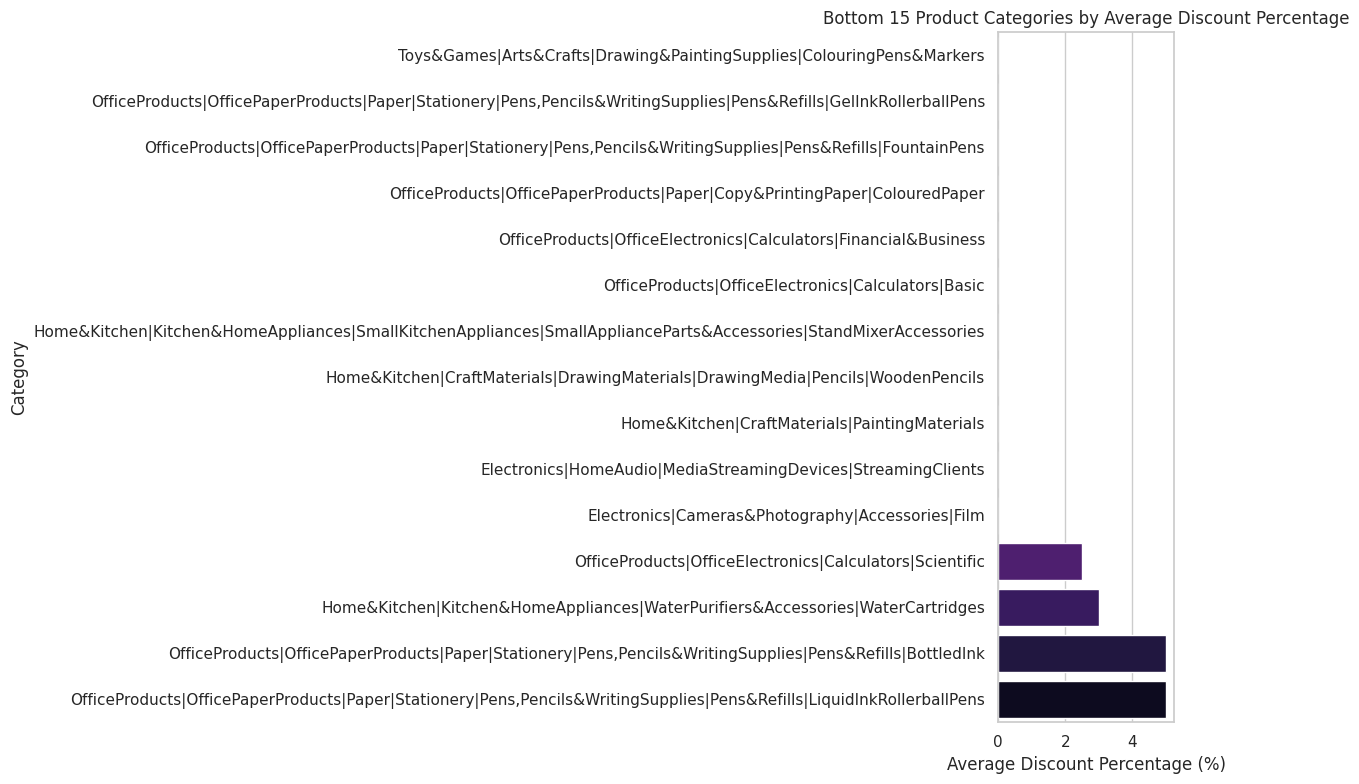

Selected categories for boxplot not found in the dataset.


In [80]:
#Q-4 How does the average discount percentage vary across categories?

import matplotlib.pyplot as plt
# The discount_percentage is already calculated and cleaned in the previous steps.
# We need to group by category and calculate the average of the 'discount_percentage' column.

# Calculate average discount percentage per category
average_discount_per_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

# Display the result
print("Average Discount Percentage by Category:")
print(average_discount_per_category)

# Visualize the average discount percentage per category (show top N for clarity)
top_n = 15 # Display top 15 categories
plt.figure(figsize=(12, 8))
sns.barplot(x=average_discount_per_category.head(top_n).values, y=average_discount_per_category.head(top_n).index, palette='viridis')
plt.xlabel('Average Discount Percentage (%)')
plt.ylabel('Category')
plt.title(f'Top {top_n} Product Categories by Average Discount Percentage')
plt.gca().invert_yaxis() # Highest average discount at the top
plt.tight_layout()
plt.show()

# Optional: Visualize the bottom N categories by average discount percentage
plt.figure(figsize=(12, 8))
sns.barplot(x=average_discount_per_category.tail(top_n).values, y=average_discount_per_category.tail(top_n).index, palette='magma')
plt.xlabel('Average Discount Percentage (%)')
plt.ylabel('Category')
plt.title(f'Bottom {top_n} Product Categories by Average Discount Percentage')
plt.gca().invert_yaxis() # Lowest average discount at the top
plt.tight_layout()
plt.show()

# You can also see the distribution of discount percentages within a few key categories using box plots.
# Select a few categories of interest
categories_to_plot = ['Electronics', 'Clothing & Accessories', 'Home & Kitchen', 'Books', 'Toys & Games']
categories_to_plot = [cat for cat in categories_to_plot if cat in df['category'].unique()] # Ensure categories exist

if categories_to_plot:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data=df[df['category'].isin(categories_to_plot)], x='discount_percentage', y='category', palette='pastel')
    plt.title('Discount Percentage Distribution for Selected Categories')
    plt.xlabel('Discount Percentage (%)')
    plt.ylabel('Category')
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()
else:
    print("Selected categories for boxplot not found in the dataset.")

Most Popular Product Names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                                

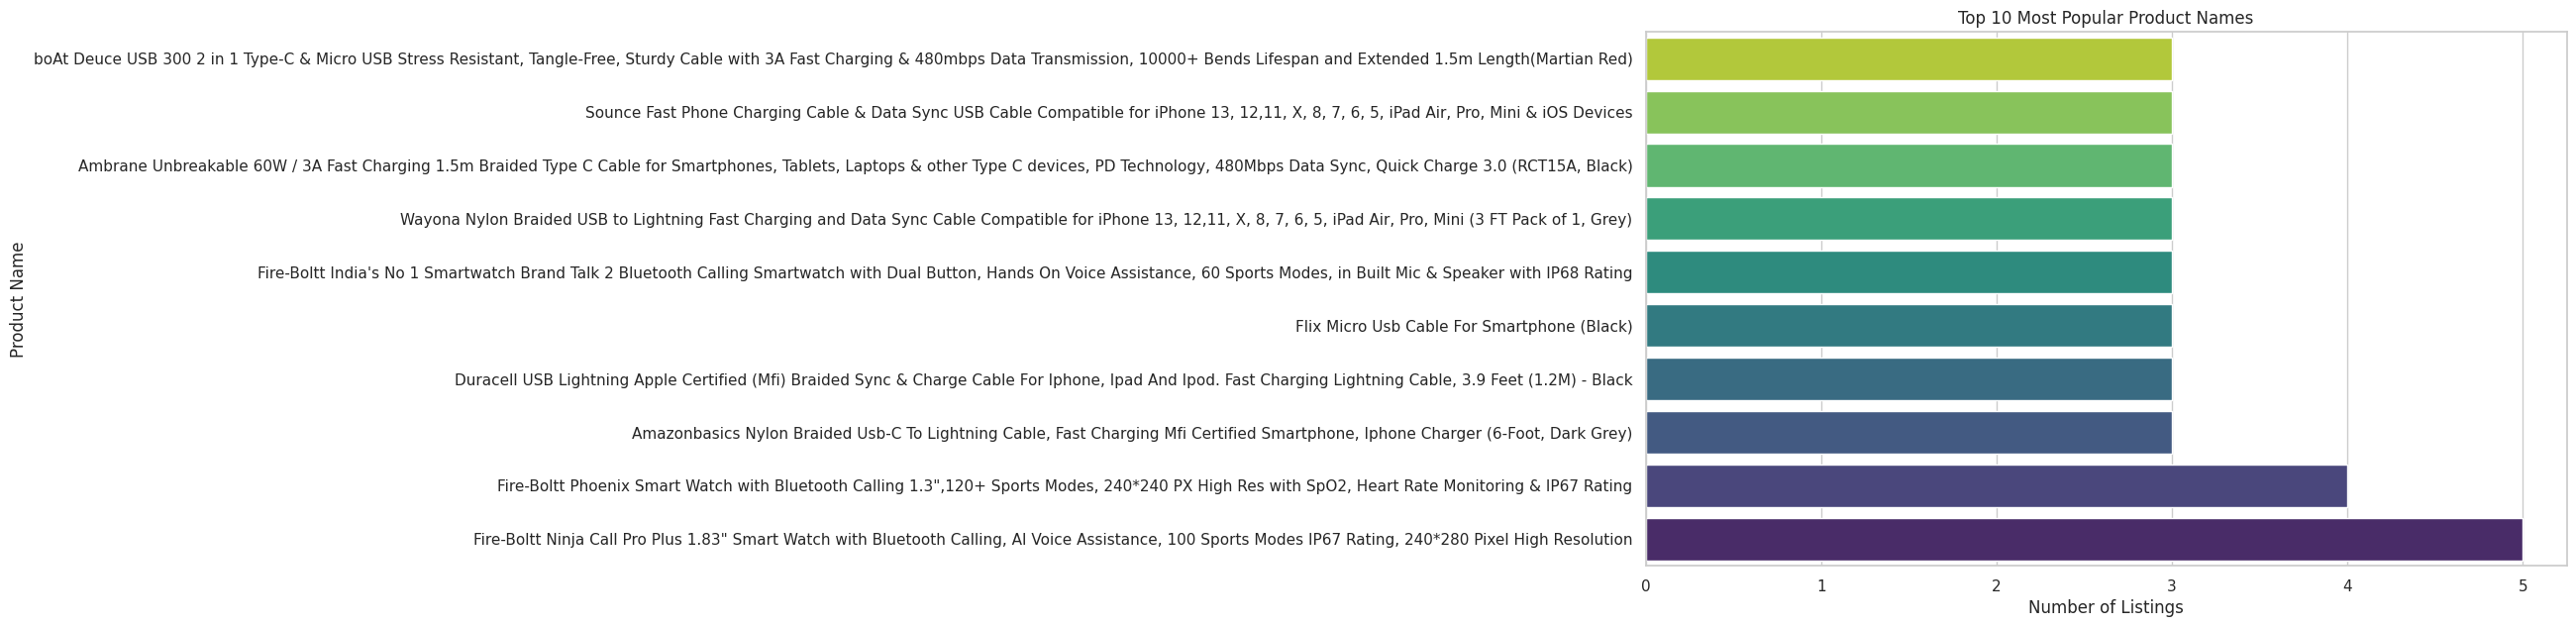

In [81]:
#Q-5 What are the most popular product names?

import matplotlib.pyplot as plt
# The product name is in the 'product_name' column.
# We need to count the occurrences of each unique product name.

product_name_counts = df['product_name'].value_counts()

# Display the most popular product names (e.g., top 10)
print("Most Popular Product Names:")
print(product_name_counts.head(10))

# Optional: Visualize the top N most popular product names
top_n = 10 # Display top 10
plt.figure(figsize=(12, 7))
sns.barplot(x=product_name_counts.head(top_n).values, y=product_name_counts.head(top_n).index, palette='viridis')
plt.xlabel('Number of Listings')
plt.ylabel('Product Name')
plt.title(f'Top {top_n} Most Popular Product Names')
plt.gca().invert_yaxis() # Highest count at the top
plt.tight_layout()
plt.show()

Most Popular Product Names (as full names):
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                                  5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                           4
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                                                            3
Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black                                                 3
Flix Micro Usb Cable For Smartphone (Black)                                                                                

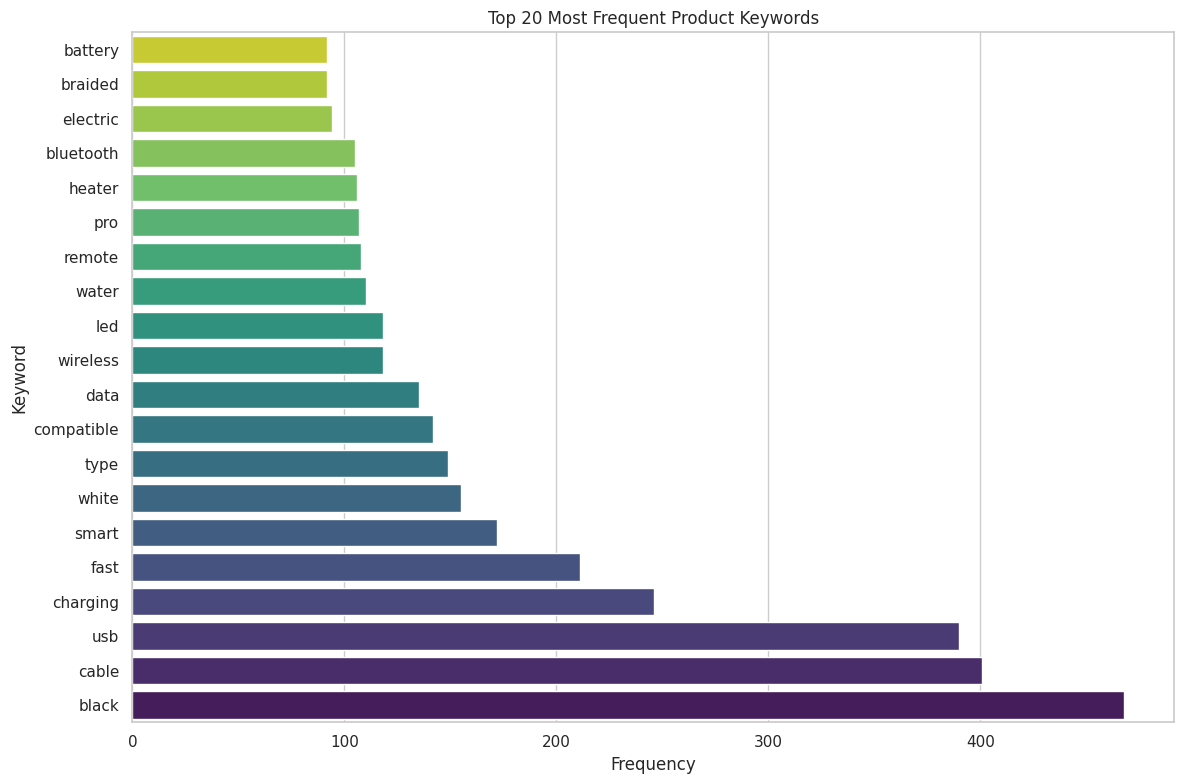

In [82]:
#Q-6 What are the most popular product keywords?

import matplotlib.pyplot as plt
# To find the most popular product keywords, we can look at the product names.
# Since product names can be long and specific, we might want to extract common words
# or phrases from them. However, without more context on what constitutes a "keyword"
# or how to tokenize/process the names, simply listing the most frequent *full* product names
# or breaking them down into individual words are common approaches.

# Option 1: Most Frequent Full Product Names (already done in Q-5)
print("Most Popular Product Names (as full names):")
print(df['product_name'].value_counts().head(10)) # Reprinting from Q-5

# Option 2: Most Frequent Individual Keywords (Words) in Product Names
# This requires splitting the product names into words and counting word frequencies.
# We should handle capitalization and potentially remove common words (stopwords) or punctuation.

import re
from collections import Counter
# You might need NLTK for more sophisticated stopword removal, but we'll do a basic approach here.
# !pip install nltk
# import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords

# Basic list of common English words to ignore (can be expanded)
# stopwords_list = set(stopwords.words('english'))
basic_stopwords = set([
    'a', 'an', 'the', 'and', 'or', 'for', 'with', 'in', 'on', 'at', 'by', 'is', 'it',
    'of', 'to', 'from', 'this', 'that', 'be', 'are', 'was', 'were', 'as', 'by', 'which',
    'can', 'will', 'new', 'for', 'and', 'or', 'with', 'is', 'are', 'be', 'in', 'on',
    'by', 'of', 'to', 'from', 'at', 'the', 'a', 'an', 'with', 'for' # Basic additions
])

# Function to clean and split product names into words
def clean_and_tokenize(name):
    # Remove punctuation and convert to lowercase
    name = re.sub(r'[^\w\s]', '', str(name).lower())
    # Split into words
    words = name.split()
    # Remove basic stopwords and short words (e.g., length < 2 or 3)
    words = [word for word in words if word not in basic_stopwords and len(word) > 2]
    return words

# Apply the function to the product_name column and flatten the list of lists
all_keywords = [word for name in df['product_name'].dropna() for word in clean_and_tokenize(name)]

# Count the frequency of each keyword
keyword_counts = Counter(all_keywords)

# Display the most common keywords (e.g., top 20)
print("\nMost Popular Product Keywords (based on individual words):")
most_common_keywords = keyword_counts.most_common(20)
print(most_common_keywords)

# Optional: Visualize the top N most popular keywords
top_n_keywords = 20
keywords, counts = zip(*most_common_keywords) # Unpack tuples

plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(keywords), palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Keyword')
plt.title(f'Top {top_n_keywords} Most Frequent Product Keywords')
plt.gca().invert_yaxis() # Highest frequency at the top
plt.tight_layout()
plt.show()

# Interpretation:
# - Option 1 shows the most common exact product titles.
# - Option 2 breaks down the titles into individual words (keywords) after basic cleaning.
#   This gives insight into the most frequently used descriptive terms, brands, or product types
#   present in the titles across the dataset.
#   For example, keywords like 'mobile', 'bluetooth', 'wireless', 'headset', 'case'
#   might appear frequently, indicating popular product types or features.


In [83]:
#Q-7 What are the most popular product reviews?

import matplotlib.pyplot as plt
# Based on the previous code, 'review' column is not present in the 'amazon.csv' dataset.
# The questions asked and the analyses performed focused on columns like 'product_name',
# 'category', 'selling_price', 'actual_price', 'discount_percentage', 'rating', and 'rating_count'.

# To find the "most popular product reviews," we would typically need a column containing review text
# and perhaps another column indicating the helpfulness or rating of the review itself.
# Since such columns are not in the provided data, we cannot directly answer "What are the most popular product reviews?"
# based on review content or popularity metrics like helpfulness votes.

# However, if "popular product reviews" is interpreted as finding the products with the most *ratings* (assuming more ratings imply more reviewed products),
# we can revisit the 'rating_count' column to find products with the highest number of reviews.

# Identify products with the highest rating counts
most_reviewed_products = df.sort_values(by='rating_count', ascending=False)

# Display the products with the highest rating counts (e.g., top 10)
print("Top Products by Number of Ratings (Most Reviewed):")
print(most_reviewed_products[['product_name', 'category', 'rating', 'rating_count', 'discounted_price', 'actual_price']].head(10))

# Optional: Visualize the top N products by rating count
top_n_products = 10
plt.figure(figsize=(12, 8))
sns.barplot(x=most_reviewed_products['rating_count'].head(top_n_products),
            y=most_reviewed_products['product_name'].head(top_n_products),
            palette='rocket')
plt.xlabel('Number of Ratings')
plt.ylabel('Product Name')
plt.title(f'Top {top_n_products} Products with the Most Ratings (Most Reviewed)')
plt.gca().invert_yaxis() # Highest count at the top
plt.tight_layout()
plt.show()

# If "popular product reviews" means the products with the highest *average rating* (assuming high ratings indicate positive "popular" reviews),
# we can identify products with high average ratings.

# Identify products with the highest average rating (and potentially a minimum number of ratings to be meaningful)
# Let's set a minimum threshold for rating_count to avoid products with high ratings based on only one or two reviews.
min_ratings_threshold = 1000 # You can adjust this number

highly_rated_products = df[df['rating_count'] >= min_ratings_threshold].sort_values(by='rating', ascending=False)

print(f"\nTop Highly Rated Products (with at least {min_ratings_threshold} ratings):")
print(highly_rated_products[['product_name', 'category', 'rating', 'rating_count', 'discounted_price', 'actual_price']].head(10))

# Note: Without actual review text data, this analysis relies on quantitative metrics ('rating_count' and 'rating') as proxies for "popular reviews".
# If you had review text, you would perform sentiment analysis, topic modeling, or look at review helpfulness votes to determine popular reviews.

Top Products by Number of Ratings (Most Reviewed):
                                          product_name  \
47   Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65   Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
12   AmazonBasics Flexible Premium HDMI Cable (Blac...   
684  AmazonBasics Flexible Premium HDMI Cable (Blac...   
400  boAt Bassheads 100 in Ear Wired Earphones with...   
352  boAt Bassheads 100 in Ear Wired Earphones with...   
584  boAt BassHeads 100 in-Ear Wired Headphones wit...   
371  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
370  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
566  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   

                                              category  rating  rating_count  \
47   Electronics|HomeTheater,TV&Video|Accessories|C...     4.4      426973.0   
65   Electronics|HomeTheater,TV&Video|Accessories|C...     4.4      426973.0   
12   Electronics|HomeTheater,TV&Video|Accessories|C...     4.4      42


Top Highly Rated Products (with at least 1000 ratings):
                                           product_name  \
1145  Swiffer Instant Electric Water Heater Faucet T...   
1299  Instant Pot Air Fryer, Vortex 2QT, Touch Contr...   
1275  Multifunctional 2 in 1 Electric Egg Boiling St...   
459   Spigen EZ Fit Tempered Glass Screen Protector ...   
249   Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...   
1223  FIGMENT Handheld Milk Frother Rechargeable, 3-...   
1388  Campfire Spring Chef Prolix Instant Portable W...   
137   10k 8k 4k HDMI Cable, Certified 48Gbps 1ms Ult...   
853   Logitech Pebble M350 Wireless Mouse with Bluet...   
964   Logitech G402 Hyperion Fury USB Wired Gaming M...   

                                               category  rating  rating_count  \
1145  Home&Kitchen|Heating,Cooling&AirQuality|WaterH...     4.8       53803.0   
1299  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...     4.8        3964.0   
1275  Home&Kitchen|Kitchen&HomeAppliances|SmallKit

The correlation between discounted_price and rating is: 0.12


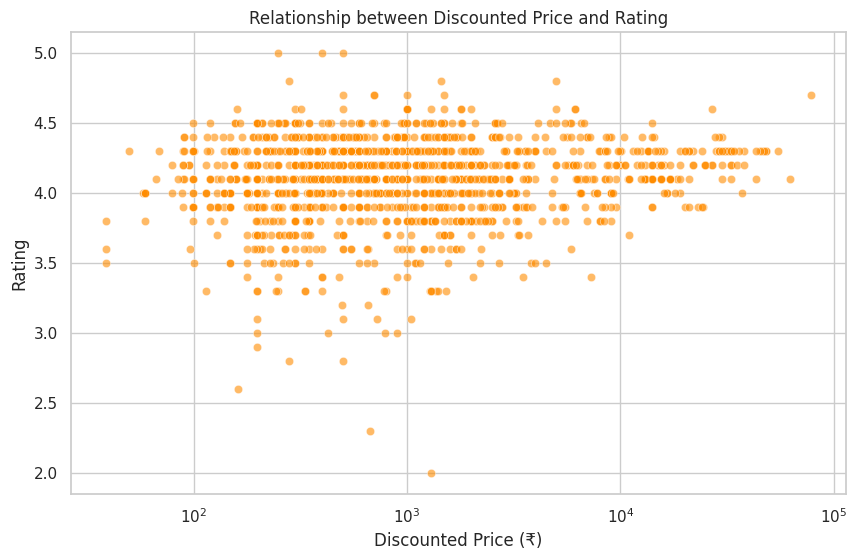


Interpretation:
There is a weak positive linear relationship between discounted price and rating.


In [84]:
#Q-8  What is the correlation between discounted_price and rating?

import matplotlib.pyplot as plt
# Calculate the correlation between discounted_price and rating
correlation_discounted_price_rating = df['discounted_price'].corr(df['rating'])

print(f"The correlation between discounted_price and rating is: {correlation_discounted_price_rating:.2f}")

# Visualize the relationship using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='discounted_price', y='rating', alpha=0.6, color='darkorange')
plt.title('Relationship between Discounted Price and Rating')
plt.xlabel('Discounted Price (₹)')
plt.ylabel('Rating')
plt.xscale('log') # Use log scale for price if the range is wide
plt.grid(True)
plt.show()

# Interpretation:
# A correlation close to 0 indicates a weak or no linear relationship.
# A positive correlation indicates that as discounted price increases, rating tends to increase.
# A negative correlation indicates that as discounted price increases, rating tends to decrease.

print("\nInterpretation:")
if abs(correlation_discounted_price_rating) < 0.1:
    print("There is a very weak or no linear relationship between discounted price and rating.")
elif correlation_discounted_price_rating > 0.1:
    print("There is a weak positive linear relationship between discounted price and rating.")
elif correlation_discounted_price_rating < -0.1:
    print("There is a weak negative linear relationship between discounted price and rating.")
else:
    print("The relationship is more moderate or strong depending on the value's magnitude.")

# Note: Correlation only measures linear relationships. The scatter plot helps visualize
# the actual pattern, which might be non-linear or influenced by other factors.


In [85]:
#Q-9 What are the Top 5 categories based on the highest ratings?

import matplotlib.pyplot as plt
# Top 5 categories based on the highest ratings
top_5_categories_by_rating = average_rating_per_category.head(5)

print("Top 5 Product Categories based on the highest ratings:")
print(top_5_categories_by_rating)

# Optional: Visualize the top 5 categories
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_categories_by_rating.values, y=top_5_categories_by_rating.index, palette='viridis')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Top 5 Product Categories by Average Rating')
plt.gca().invert_yaxis() # Highest rating at the top
plt.tight_layout()
plt.show()

Top 5 Product Categories based on the highest ratings:
category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Computers&Accessories|Components|Memory                                     4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
Name: rating, dtype: float64


#Q-10 Identify any potential areas for improvement or optimization based on the data analysis.

Product-Level Insights (Business Optimization)

1. Low-Rated Categories
Observation: Some categories like Coffee Grinders, PC Headsets, and 3D Glasses have average ratings between 3.3 and 3.5.

Action:

Investigate specific products pulling the average down.

Analyze user complaints in review_content.

Consider improving product features or quality or removing underperforming items.

2. High Discount, Low Rating
Check: Products with high discount_percentage but low rating.

Reason: These might be struggling products that rely heavily on discounts to sell.

Action: Focus on quality over discount strategy; assess if deeper issues exist.

3. Highly Rated but Low Review Count
Some categories might show a high average rating but have very few rating_count values.

Action: Promote these products more or incentivize reviews to build trust.

4. Category Optimization
Observation: Certain categories (e.g., Tablets, Streaming Clients) consistently perform well.

Action:

Invest more in inventory or marketing in those categories.

Use these as benchmarks for new product development.

🧹 Data-Level Optimization
1. Data Types
Initially, all columns were object type (strings), even numeric ones.

Action: Clean and convert columns as early as possible to ensure accurate analysis.

2. Missing or Inconsistent Data
Columns like rating_count and rating had missing or malformed values.

Action: Implement validation during data entry or scraping.

3. Multi-Valued Columns
Fields like user_id, review_id, and user_name contain comma-separated values — likely a data collection flaw.

Action: Normalize data (1 review per row) to enable better user-level analysis.

Advanced Opportunities (Optional)
Sentiment Analysis: Analyze review_content to identify common issues or praise.

Time Series: If time-based data is available, track how ratings and sales change over time.

Feature Engineering: Create new columns like price_diff, is_discounted, or rating_density = rating_count / product.



#EDA - 4#

**Spotify Data:Popular Hip-Hop Artists and Tracks**

In [86]:
from google.colab import files
uploaded = files.upload()

Saving spotify.csv to spotify.csv


In [87]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set visual style
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv("spotify.csv")  # Make sure the file is in your working directory

# Display the first few rows
print(df.head())

# Basic info about the dataset
df.info()


  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null

In [88]:
#Q-1  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

# Import libraries
import pandas as pd

# Read the CSV file
df = pd.read_csv("spotify.csv")

# Display basic information
print("Initial Data Shape:", df.shape)

# Check for null (missing) values
print("\nMissing Values:\n", df.isnull().sum())

# Drop rows with any missing values (if any)
if df.isnull().values.any():
    df.dropna(inplace=True)
    print("Missing values found and removed.")
else:
    print("No missing values found.")

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_count)

# Drop duplicate rows (if any)
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicate rows removed.")

# Final shape of the data
print("\nFinal Data Shape:", df.shape)


Initial Data Shape: (440, 5)

Missing Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64
No missing values found.

Number of duplicate rows: 27
Duplicate rows removed.

Final Data Shape: (413, 5)


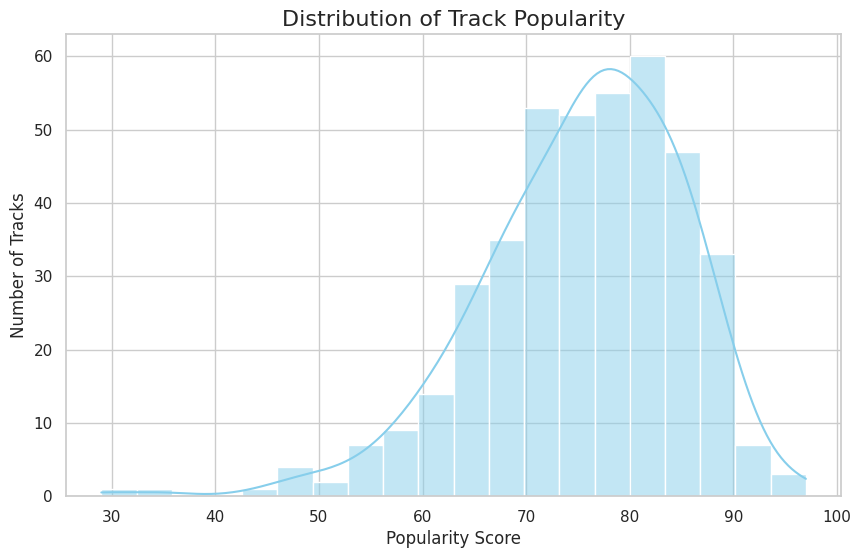

In [89]:
#Q-2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color='skyblue')

# Add titles and labels
plt.title('Distribution of Track Popularity', fontsize=16)
plt.xlabel('Popularity Score', fontsize=12)
plt.ylabel('Number of Tracks', fontsize=12)

# Show the plot
plt.show()


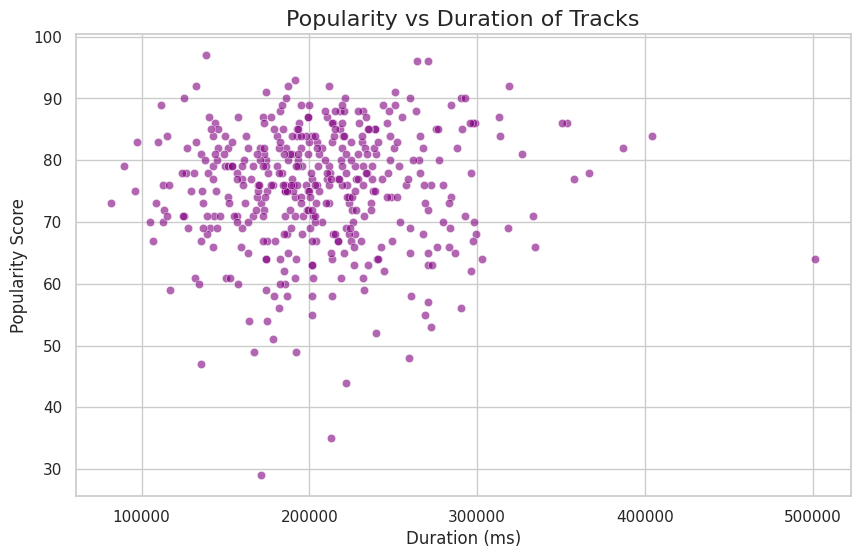

In [90]:
#Q-3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (ms)', y='Popularity', color='purple', alpha=0.6)

# Add titles and labels
plt.title('Popularity vs Duration of Tracks', fontsize=16)
plt.xlabel('Duration (ms)', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)

# Show the plot
plt.show()


🎤 Artist with the most tracks: Drake (17 tracks)


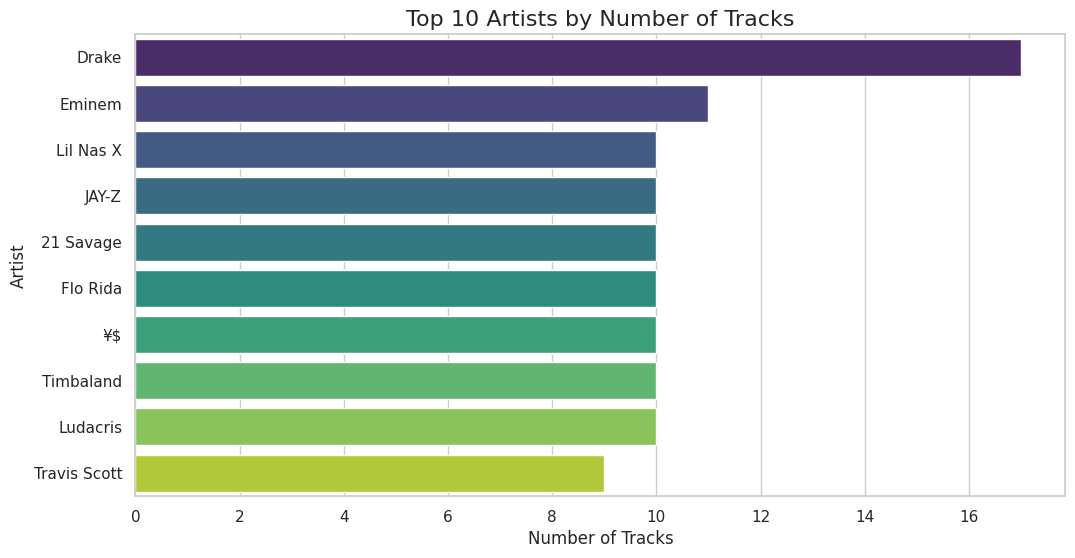

In [91]:
# Q-4  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of tracks per artist
artist_counts = df['Artist'].value_counts()

# Display the artist with the highest number of tracks
top_artist = artist_counts.idxmax()
top_count = artist_counts.max()
print(f"🎤 Artist with the most tracks: {top_artist} ({top_count} tracks)")

# Plot the top 10 artists by number of tracks
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Artist', order=artist_counts.head(10).index, palette='viridis')

# Add labels and title
plt.title('Top 10 Artists by Number of Tracks', fontsize=16)
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')

# Show the plot
plt.show()


In [92]:
#Q-5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

# Sort by popularity in ascending order and select top 5
least_popular_tracks = df.sort_values(by='Popularity', ascending=True).head(5)

# Display artist and track name
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks[['Artist', 'Track Name', 'Popularity']])


Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [93]:
#Q-6  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
# Step 1: Get top 5 artists by number of tracks
top_5_artists = df['Artist'].value_counts().head(5).index

# Step 2: Filter dataset for these artists
top_artists_df = df[df['Artist'].isin(top_5_artists)]

# Step 3: Group by artist and calculate average popularity
avg_popularity = top_artists_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Step 4: Display results
print("🎵 Average Popularity of Top 5 Artists by Track Count:")
print(avg_popularity)

# Step 5: Identify artist with highest average popularity
top_avg_artist = avg_popularity.idxmax()
top_avg_score = avg_popularity.max()
print(f"\n🌟 Artist with the highest average popularity: {top_avg_artist} ({top_avg_score:.2f})")


🎵 Average Popularity of Top 5 Artists by Track Count:
Artist
21 Savage    83.800000
Eminem       83.636364
Drake        82.882353
JAY-Z        77.900000
Lil Nas X    75.900000
Name: Popularity, dtype: float64

🌟 Artist with the highest average popularity: 21 Savage (83.80)


In [95]:
#Q-7  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

# Step 1: Calculate average popularity per artist
avg_popularity_per_artist = df.groupby('Artist')['Popularity'].mean()

# Step 2: Get top 5 most popular artists by average popularity
top_5_popular_artists = avg_popularity_per_artist.sort_values(ascending=False).head(5).index

# Step 3: For each artist, get their most popular track
print("🎶 Most Popular Track for Each of the Top 5 Artists:\n")

for artist in top_5_popular_artists:
    artist_tracks = df[df['Artist'] == artist]
    top_track = artist_tracks.loc[artist_tracks['Popularity'].idxmax()]
    print(f"{artist}: '{top_track['Track Name']}' (Popularity: {top_track['Popularity']})")


🎶 Most Popular Track for Each of the Top 5 Artists:

cassö: 'Prada' (Popularity: 92)
Trueno: 'Mamichula - con Nicki Nicole' (Popularity: 89)
David Guetta: 'Baby Don't Hurt Me' (Popularity: 87)
Travis Scott: 'FE!N (feat. Playboi Carti)' (Popularity: 93)
¥$: 'CARNIVAL' (Popularity: 96)


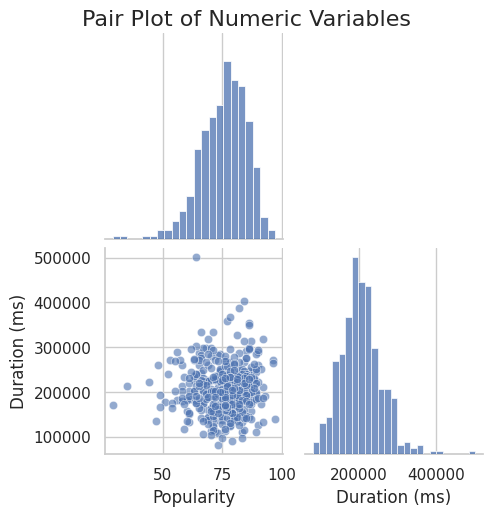

In [96]:
#Q-8  Visualize relationships between multiple numerical variables simultaneously using a pair plot.
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df[['Popularity', 'Duration (ms)']]

# Create pair plot
sns.pairplot(numeric_df, corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Numeric Variables", y=1.02, fontsize=16)
plt.show()


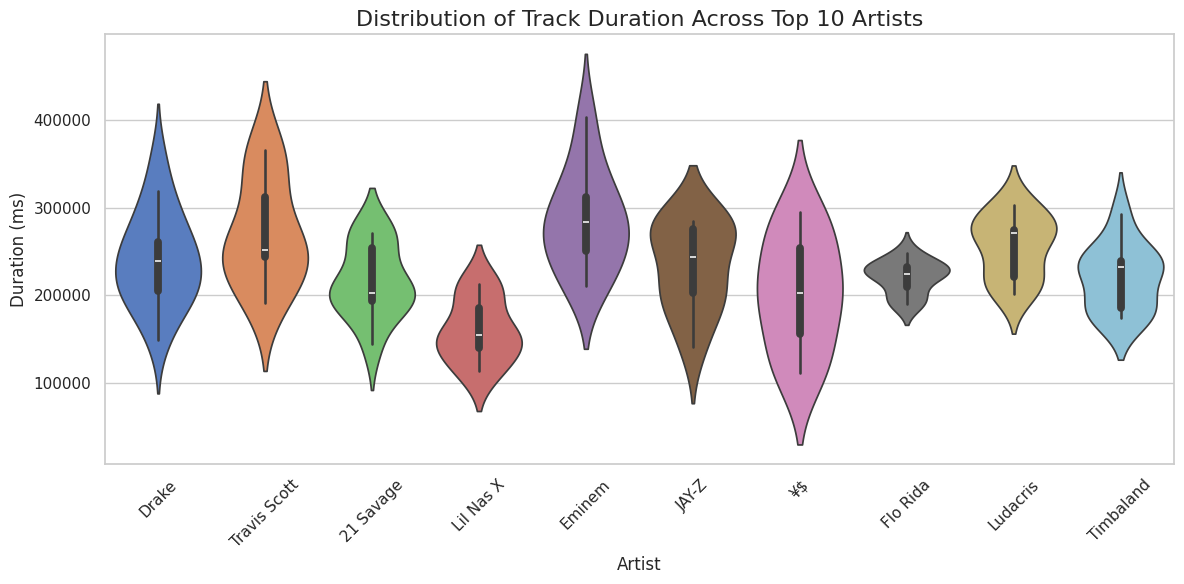

In [97]:
# Q-9  Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

import seaborn as sns
import matplotlib.pyplot as plt

# Select top 10 artists by number of tracks
top_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_artists)]

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Duration (ms)', palette='muted')

# Add labels and title
plt.title('Distribution of Track Duration Across Top 10 Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Duration (ms)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


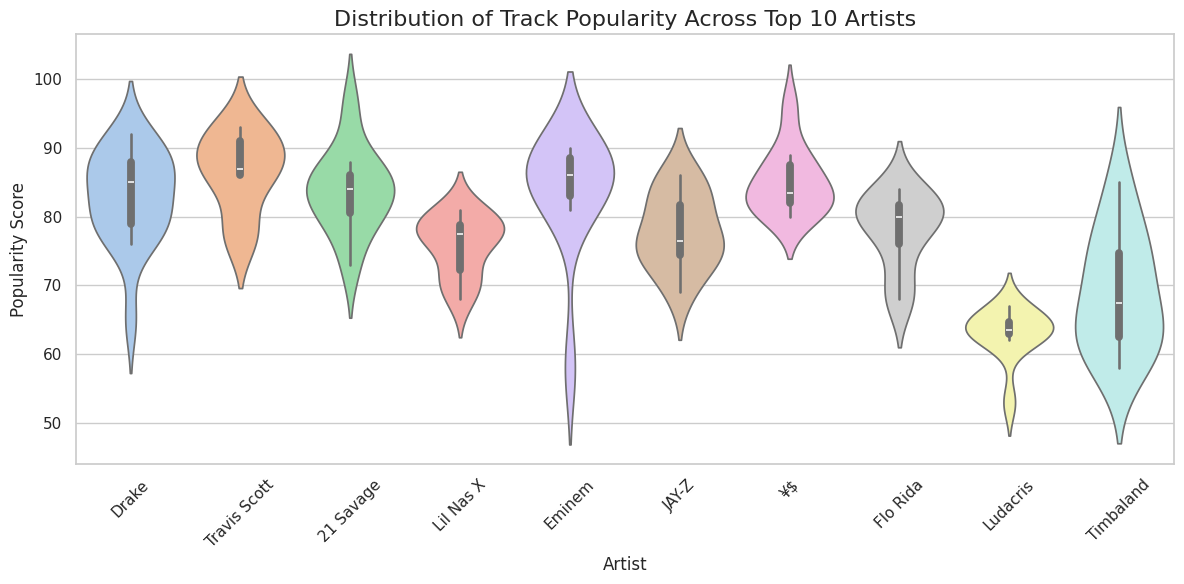

In [98]:
# Q-10  How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

import seaborn as sns
import matplotlib.pyplot as plt

# Get top 10 artists by number of tracks
top_artists = df['Artist'].value_counts().head(10).index
filtered_df = df[df['Artist'].isin(top_artists)]

# Create violin plot for popularity
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_df, x='Artist', y='Popularity', palette='pastel')

# Add labels and title
plt.title('Distribution of Track Popularity Across Top 10 Artists', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity Score', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
